<img src="figs/pngs/network_science_tutorial.png" width=600px>

# A brief introduction to network science: a love story
by __[Brennan Klein](https://github.com/jkbren)__, __[Hunter Wapman](https://github.com/hneutr)__, and __[Alec Kirkley](https://lsa.umich.edu/physics/people/graduate-students/akirkley.html)__


## Packages used in this tutorial
* numpy
* scipy
* networkx
* pandas
* matplotlib

### Other useful ones
* igraph
* graph-tool (Hunter will give you \$4 if you install it...)

# networkx
"NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks" (source: https://networkx.github.io/).

* It allows fast prototyping, it is easy to learn, and it is multi-platform
* Python language data structures for graphs, digraphs, and multigraphs.
* Many network structure and analysis measures are already implemented
* Generators for classic graphs, random graphs, and synthetic networks
* Nodes can be "anything" (e.g. text, images, XML records)
* Edges can hold arbitrary data (e.g. weights, time-series)

In [10]:
import networkx as nx

### Adding nodes

In [2]:
# Let's create two distinct empty graphs: 

graph = nx.Graph() # undirected graph
digraph = nx.DiGraph() # directed graph

In [3]:
# First, we can populate the graphs with some nodes
# We can do this in several ways:

# 1) We can add one node at the time
for i in range(10):
    graph.add_node(i)

In [4]:
# 2) We can add nodes from a list or any other iterable container
nodes = ['a','b', 'c','d','e'] # notice that nodes can be strings
digraph.add_nodes_from(nodes)

In [5]:
# 3) We can also directly add edges and if the node is not present, it will be added
graph.add_edge(1,20)

In [6]:
# We can retrieve the list of nodes in each graph by accessing
print(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]


### Adding Edges

In [7]:
# Now that we added a bunch of nodes, we can add some edges
# 1) We can add one edge at the time (as we have just witnessed above)
digraph.add_edge('a','b')
digraph.add_edge('c','a')

In [8]:
# 2) We can add an entire edge list all at once
edge_list = [(1,2), (3,5), (9,4), (4,7)]
graph.add_edges_from(edge_list)

In [9]:
# We can retrieve the list of edges in each graph by simply running
print(digraph.edges())

[('a', 'b'), ('c', 'a')]


In [10]:
# However, when graphs are big (either in terms of the number of nodes or in terms of the number of edges),
# it is more convenient to loop over "iterators" and not over lists.
for edge in graph.edges():
    print(edge)

(1, 20)
(1, 2)
(3, 5)
(4, 9)
(4, 7)


In [11]:
# We can also retrieve the list of neighbors of a given node
print(list(graph.neighbors(1)))
print(list(digraph.predecessors('a')))
print(list(digraph.successors('a')))

[20, 2]
['c']
['b']


### Adding node and edge attributes
In NetworkX, we can add additional features to our graphs other than the simple presence of nodes and edges. <br>
In particular, we can add attributes to both entities. <br>


In [12]:
# For example, we might wanna add a "size" attribute to each node, 
# so we can use it once we decide to visualize a graph.
graph.add_node(50,size=100)

In [13]:
print(graph.nodes(data=True)) # the "data=True" bit means you want to see node attributes

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (20, {}), (50, {'size': 100})]


In [14]:
# or we might want to associate a "weight" to each edge we include in the graph
digraph.add_edge('a','b',weight=10)

In [15]:
print(digraph.edges(data=True))

[('a', 'b', {'weight': 10}), ('c', 'a', {})]


In [16]:
# However, we might also want to add a new attribute to all nodes or edges already present in the graph.
# This can be done using the "set_node_attributes" or "set_edge_attributes" methods provided by NetworkX:

new_node_attribute_values = {node:75 for node in graph.nodes()}
nx.set_node_attributes(graph, new_node_attribute_values, 'size')
# graph= the data you want, new_node_attribute_values is the variable you're adding,
# 'size'= is the name of the attribute

In [17]:
print(graph.nodes(data=True))

[(0, {'size': 75}), (1, {'size': 75}), (2, {'size': 75}), (3, {'size': 75}), (4, {'size': 75}), (5, {'size': 75}), (6, {'size': 75}), (7, {'size': 75}), (8, {'size': 75}), (9, {'size': 75}), (20, {'size': 75}), (50, {'size': 75})]


In [18]:
new_edge_attribute_values = {edge:'blue' for edge in graph.edges()}
nx.set_edge_attributes(graph, new_edge_attribute_values, 'color')

In [19]:
print(graph.edges(data=True))

[(1, 20, {'color': 'blue'}), (1, 2, {'color': 'blue'}), (3, 5, {'color': 'blue'}), (4, 9, {'color': 'blue'}), (4, 7, {'color': 'blue'})]


### Removing Nodes and Edges

In [20]:
# We can remove all nodes and edges
digraph.clear()
print(digraph.nodes())

[]


In [21]:
# Or simply remove some of the nodes/edges..
#..one item at the time
graph.remove_edge(1,2)
graph.remove_node(7)

In [22]:
#..or several items all at once
edge_list = [(1,2), (9,4)]
graph.remove_edges_from(edge_list)

node_list = [3,5]
graph.remove_nodes_from(node_list)

### Get the number of nodes and links in the graph

In [24]:
edge_list = [(1,2), (3,5), (9,4), (4,7)]
graph.add_edges_from(edge_list)

print("Number of nodes: %d" % graph.number_of_nodes())
print("Number of edges: %d" % graph.number_of_edges())

NameError: name 'graph' is not defined

In [25]:
# Let us use once again the polblogs dataset
digraph = nx.DiGraph()
with open('./datasets/polblogs_nodes_class.tsv','r') as fp:
    for line in fp:
        node_id, node_label, node_political = line.strip().split('\t')
        political_orientation = 'liberal' if node_political == '0' else 'conservative'
        digraph.add_node(node_id, website=node_label, political_orientation=political_orientation)

In [26]:
with open('./datasets/polblogs_edges_class.tsv','r') as fp:
    for line in fp:
        source_node_id, target_node_id = line.strip().split('\t')
        digraph.add_edge(source_node_id, target_node_id)

In [27]:
print("Number of nodes: %d" % digraph.number_of_nodes())
print("Number of edges: %d" % digraph.number_of_edges())
print("Graph density:\t %1.7f" % nx.density(digraph))

Number of nodes: 1490
Number of edges: 19025
Graph density:	 0.0085752


### Degree

In [28]:
degree = digraph.degree()
in_degree = digraph.in_degree()
out_degree = digraph.out_degree()

# I ususally make this a dictionary straight away
degree = dict(degree)
in_degree = dict(in_degree)
out_degree = dict(out_degree)

# print(degree)

In [29]:
import numpy as np

node = list(digraph.nodes())[0]

print('Degree of node %s: %d' % (node, degree[node]))
print('In-degree of node %s: %d' % (node, in_degree[node]))
print('Out-degree of node %s: %d' % (node, out_degree[node]))
print("Node %s's political orientation: %s" %(node, digraph.node[node]['political_orientation']))
print()
print("Average degree: %1.2f" % np.mean(list(degree.values())))
print("Average in-degree: %1.2f" % np.mean(list(in_degree.values())))
print("Average out-degree: %1.2f" % np.mean(list(out_degree.values())))

Degree of node 0: 27
In-degree of node 0: 12
Out-degree of node 0: 15
Node 0's political orientation: liberal

Average degree: 25.54
Average in-degree: 12.77
Average out-degree: 12.77


### Connectivity patterns between liberal and conservative blogs


In [30]:
# Let us define two sets:
# 1) a set of "liberal" nodes
# 2) a set of "conservative" nodes

liberal = set()
conservative = set()

for node_id in digraph.nodes():

    if digraph.node[node_id]['political_orientation'] == 'liberal':
        liberal.add(node_id)
        
    else:
        conservative.add(node_id)

print("Number of liberal blogs: %d" % len(liberal))
print("Number of conservative blogs: %d" % len(conservative))

Number of liberal blogs: 758
Number of conservative blogs: 732


Let's now compute:
1. the number of edges between liberal blogs
2. the number of edges between conservative blogs
3. the number of edges from conservative blogs to liberal blogs
4. the number of edges from liberal blogs to conservative blogs


In [31]:
liberal_liberal = 0
conservative_conservative = 0
liberal_conservative = 0
conservative_liberal = 0

for source_node_id, target_node_id in digraph.edges():
    
    if (source_node_id in liberal) and (target_node_id in liberal):
        liberal_liberal += 1
        
    elif (source_node_id in liberal) and (target_node_id in conservative):
        liberal_conservative += 1
        
    elif (source_node_id in conservative) and (target_node_id in liberal):
        conservative_liberal += 1
        
    else:
        conservative_conservative += 1

In [32]:
print("Number of edges between liberal blogs: %d (%1.3f)" % (liberal_liberal, 
                                       liberal_liberal/float(digraph.number_of_edges()) ))
print("Number of edges between conservative blogs: %d (%1.3f)" % (conservative_conservative, 
                                            conservative_conservative/float(digraph.number_of_edges()) ))
print("Number of edges from liberal to conservative blogs: %d (%1.3f)" % (liberal_conservative, 
                                                    liberal_conservative/float(digraph.number_of_edges()) ))
print("Number of edges from conservative to liberal blogs: %d (%1.3f)" % (conservative_liberal, 
                                                    conservative_liberal/float(digraph.number_of_edges()) ))

Number of edges between liberal blogs: 8387 (0.441)
Number of edges between conservative blogs: 8955 (0.471)
Number of edges from liberal to conservative blogs: 781 (0.041)
Number of edges from conservative to liberal blogs: 902 (0.047)


### Components

In [33]:
# Number of components
print("Number of weakly connected components: %d" % nx.number_weakly_connected_components(digraph))
print("Number of strongly connected components: %d" % nx.number_strongly_connected_components(digraph))

# Find the size of the giant weakly connected component
N = digraph.number_of_nodes()
wccs = sorted(nx.weakly_connected_component_subgraphs(digraph), key=len, reverse=True)
gwcc = wccs[0]
print("Size of the weakly giant connected component: %d (%1.2f)" % (len(gwcc), len(gwcc)/N))

# Find the size of the giant strongly connected component
sccs = sorted(nx.strongly_connected_component_subgraphs(digraph), key=len, reverse=True)
gscc = sccs[0]
print("Size of the strongly giant connected component: %d (%1.2f)" %  (len(gscc), len(gscc)/N))

Number of weakly connected components: 268
Number of strongly connected components: 688
Size of the weakly giant connected component: 1222 (0.82)
Size of the strongly giant connected component: 793 (0.53)


### Paths


In [34]:
graph = gscc
print("Is the graph directed?",graph.is_directed())

print("Average shortest-path length: %1.3f" % nx.average_shortest_path_length(graph))
print("Graph radius: %1.3f" % nx.radius(graph))
print("Graph diameter: %1.3f" % nx.diameter(graph))

graph = graph.to_undirected()
print("Average shortest-path length: %1.3f" % nx.average_shortest_path_length(graph))
print("Graph radius: %1.3f" % nx.radius(graph))
print("Graph diameter: %1.3f" % nx.diameter(graph))

Is the graph directed? True
Average shortest-path length: 3.189
Graph radius: 5.000
Graph diameter: 8.000
Average shortest-path length: 2.424
Graph radius: 3.000
Graph diameter: 5.000


In [35]:
graph.number_of_nodes()

793

## Let's visualize this
(helpful color website: http://tools.medialab.sciences-po.fr/iwanthue/)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
cols = ["#c5c03a","#7275d7","#8fb755","#c361bd","#5ec384","#d3537a","#3fe0d8","#cb6b3b"]

In [38]:
# get the political leanings and assign them to colors
leanings = nx.get_node_attributes(graph,'political_orientation')
node_colors = [cols[0] if leaning=='conservative' else cols[1] for leaning in leanings.values()]

edge_colors = '#999999'

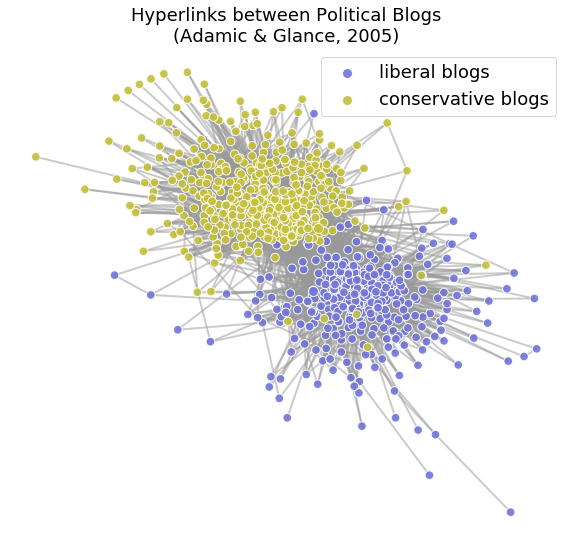

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,9))

# first assign nodes to a position in the pos dictionary
pos = nx.spring_layout(graph)

# then draw the nodes
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=75, edgecolors='w', alpha=0.9, ax=ax)

## without node outlines
# nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=75, alpha=0.9, ax=ax)

# then draw the edges
nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2, alpha=0.5, ax=ax)

ax.set_title('Hyperlinks between Political Blogs\n(Adamic & Glance, 2005)', fontsize=18)
ax.set_axis_off()

legend_node0 = '0'
legend_node1 = '1000'

##### just for adding legend, is unnecessary #####
nx.draw_networkx_nodes(graph, {legend_node0:pos[legend_node0]}, nodelist=[legend_node0], 
                       label='liberal blogs', 
                       node_color=cols[1], node_size=100, edgecolors='w', alpha=0.9, ax=ax)
nx.draw_networkx_nodes(graph, {legend_node1:pos[legend_node1]}, nodelist=[legend_node1], 
                       label='conservative blogs',
                       node_color=cols[0], node_size=100, edgecolors='w', alpha=0.9, ax=ax)
ax.legend(fontsize=18)


## I tend to save two figures each time:
## - one png, which is good for slides, and
## - one pdf, which is good for papers

plt.savefig('figs/pngs/PolBlogs_network.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/PolBlogs_network.pdf', dpi=425, bbox_inches='tight')
plt.show()

### Different network layouts

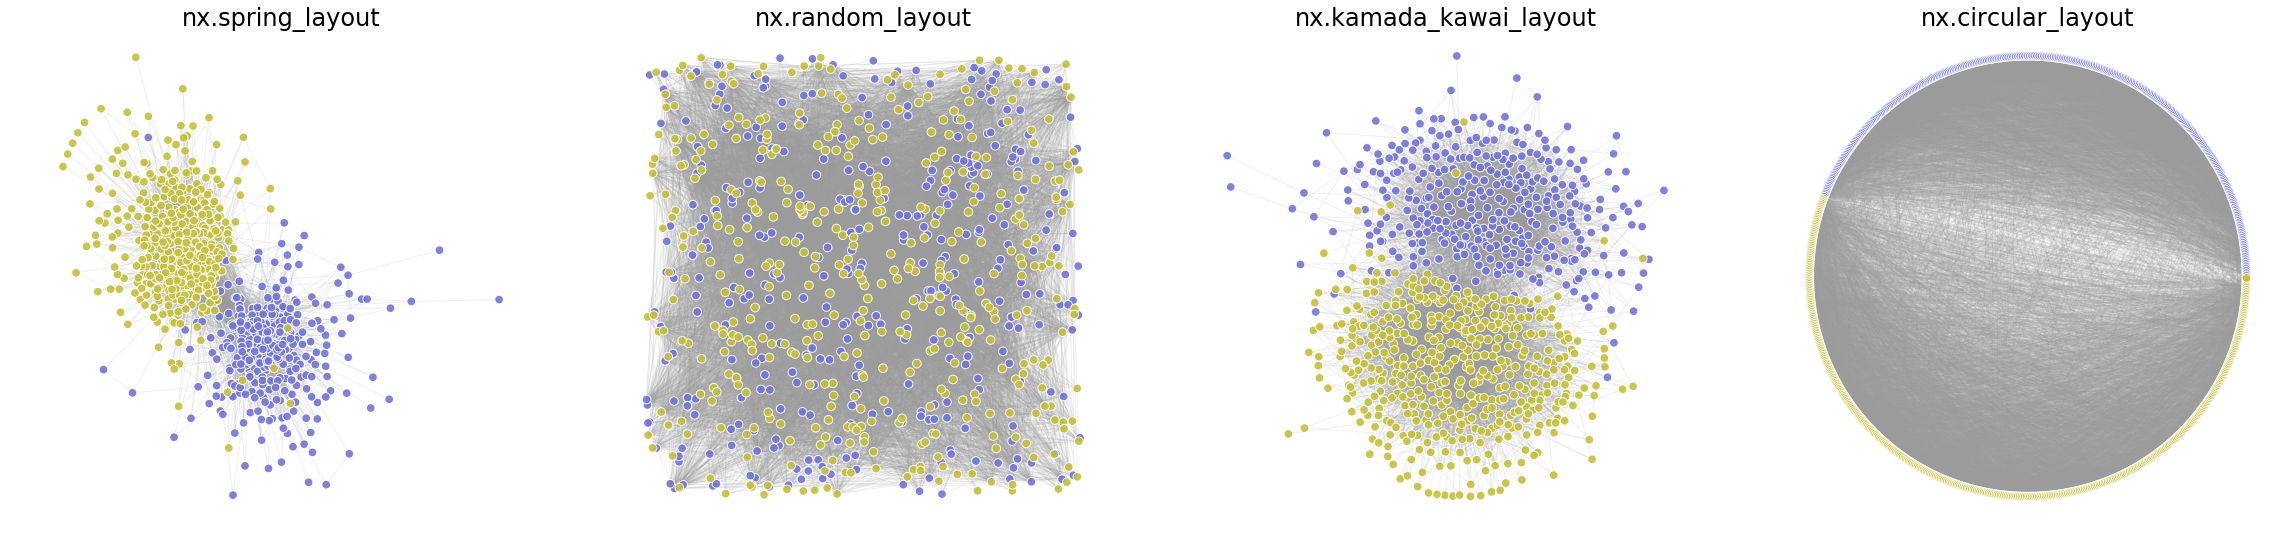

In [40]:
fig, ax = plt.subplots(1,4,figsize=(40,9))

pos0 = nx.spring_layout(graph)
pos1 = nx.random_layout(graph)
pos2 = nx.kamada_kawai_layout(graph)
pos3 = nx.circular_layout(graph)

pos_list = [pos0, pos1, pos2, pos3]
pos_titles = ['nx.spring_layout', 'nx.random_layout', 'nx.kamada_kawai_layout', 'nx.circular_layout']

for i,pos in enumerate(pos_list):
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, 
                           node_size=75, edgecolors='w', alpha=0.9, ax=ax[i])
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, 
                           width=1, alpha=0.15, ax=ax[i])
    
    ax[i].set_title(pos_titles[i], fontsize=24)
    ax[i].set_axis_off()

plt.savefig('figs/pngs/PolBlogs_network_4layouts.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/PolBlogs_network_4layouts.pdf', dpi=425, bbox_inches='tight')
plt.show()

## Connectivity vs. Clustering

Node degree tells us how many neighbors each vertex has. However, we might also want to know how one node's neighbors are related to each other.

The concept of __*clustering*__ (or *transitivity* in the context of sociology) refers exaclty to this: the tendency--in real networks--of nodes forming cliques around a given vertex.

Given an *undirected* graph $G=(V,E)$, let us define the __*clustering coefficient*__ as the probability that any two neighbors $j$ and $k$ of node $i$ are connected: 

$$ C(i) = 
  \begin{cases}
    \dfrac{e_i}{k_i(k_i-1)/2}       & \quad \text{if } k_{i}>1\\
    0  & \quad \text{if } k_{i}\leq 1\\
  \end{cases}$$
  
where $k_i$ is the degree of node $i$ and $e_i$ the number of edges that exists between the neighbors of node $i$.

In other words, the clustering coefficient of a node represents the ratio between the number of
triangles in the subgraph $G'$ induced by node $i$ and its neighbors over the number of all possible
triangles that would be present if $G'$ was a complete graph.

The average clustering coefficient of <i>undirected</i> graph is simply:

$$\langle C \rangle = \frac{1}{N}\sum_i C(i)$$

In *directed* graphs, the definition of clustering can be further refined since 8 different types of *triangles* can be present in our graph (see Fagiolo, 2007).

# Degree Distributions

The <strong><i>degree distribution</i></strong> $P(k)$ of <i>undirected</i> graphs is defined as the probability that any randomly chosen vertex has degree $k$. <br>
In <i>directed</i> graphs, we need to consider two distributions: the <strong><i>in-degree</i></strong> $P(k_{in})$ and <strong><i>out-degree</i></strong> $P(k_{out})$ distributions, defined as the probability that a randomly chosen vertex has <i>in-degree</i> $k_{in}$ and <i>out-degree</i> $k_{out}$, respectively. 

In many real world networks, degree distributions are <i>skewed</i> and <i>highly variable</i> (i.e. the support of the distribution spans several orders of magnitude). <br> In many cases, this <strong><i>heavy tailed</i></strong> behavior can be approximated by a power-law decay $P(k)\sim k^{-\alpha}$.

To understand the significance of observing heavy tailed degree distributions, let us look at the first two moments of the degree distribution when $P(k)\sim k^{-\alpha}$. 

First, let us fully characterize $P(k)$:

$$ P(k) = Ck^{-\alpha}, $$ 

where $C$ is a normalizing constant. We also now that the following must hold:  

$$\int_{k_{min}}^\infty P(k) dk = 1$$ 

We can show that since: 

$$\left[ \int_{k_{min}}^\infty P(k) = C\frac{k^{1-\alpha}}{1-\alpha} \right]_{k_{min}}^\infty = 1$$

then:

$$ C = \frac{\alpha-1}{k_{min}^{1-\alpha}}$$

If $\alpha>1$, it follows that:

$$P(k) =  \frac{\alpha-1}{k_{min}} \left(\frac{k}{k_{min}}\right)^{-\alpha} $$

The __first moment__ of the distribution is then:

$$\langle k \rangle = \int_{k_{min}}^\infty kP(k) = \int_{k_{min}}^\infty k \frac{\alpha-1}{k_{min}} \left(\frac{k}{k_{min}}\right)^{-\alpha} = \frac{\alpha-1}{\alpha-2}k_{min}, $$

if $\alpha > 2$.

The __second moment__ of the distribution, instead, is:

$$\langle k^2 \rangle = \int_{k_{min}}^\infty k^2P(k) = \int_{k_{min}}^\infty k^2 \frac{\alpha-1}{k_{min}} \left(\frac{k}{k_{min}}\right)^{-\alpha} = \frac{\alpha-1}{\alpha-3}(k_{min}^2), $$

if $\alpha > 3$.

In [40]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                           bins = bins,
                           density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [41]:
x1,y1 = plot_degree(list(in_degree.values()), number_of_bins=80, log_binning=True, base=2)
x2,y2 = plot_degree(list(out_degree.values()), number_of_bins=80, log_binning=True, base=2)

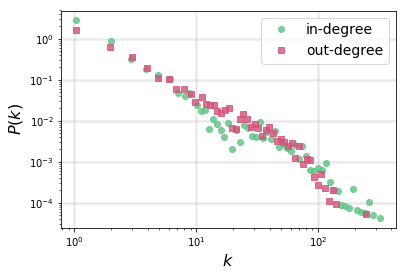

In [42]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.loglog(x1, y1,'o', color=cols[4], label='in-degree', alpha=0.8)
ax.loglog(x2, y2,'s', color=cols[5], label='out-degree', alpha=0.8)
ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.legend(fontsize=14)

ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/PolBlogs_inout_degreedist.pdf', dpi=425, bbox_inches='tight')
plt.show()

### Linear binning vs log binning

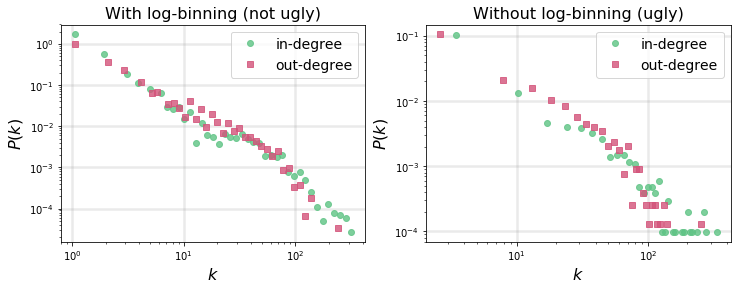

In [43]:
# Note: your plots will look stupid if you don't do log binning...
nbins = 50
fig, ax = plt.subplots(1,2,figsize=(12,4))

x1,y1 = plot_degree(list(in_degree.values()), number_of_bins=nbins, log_binning=True, base=2)
x2,y2 = plot_degree(list(out_degree.values()), number_of_bins=nbins, log_binning=True, base=2)
ax[0].loglog(x1, y1,'o', color=cols[4], label='in-degree', alpha=0.8)
ax[0].loglog(x2, y2,'s', color=cols[5], label='out-degree', alpha=0.8)
ax[0].set_xlabel(r"$k$", fontsize=16)
ax[0].set_ylabel(r"$P(k)$", fontsize=16)
ax[0].legend(fontsize=14)
ax[0].grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')
ax[0].set_title('With log-binning (not ugly)', fontsize=16)

x1,y1 = plot_degree(list(in_degree.values()), number_of_bins=nbins, log_binning=False, base=2)
x2,y2 = plot_degree(list(out_degree.values()), number_of_bins=nbins, log_binning=False, base=2)
ax[1].loglog(x1, y1,'o', color=cols[4], label='in-degree', alpha=0.8)
ax[1].loglog(x2, y2,'s', color=cols[5], label='out-degree', alpha=0.8)
ax[1].set_xlabel(r"$k$", fontsize=16)
ax[1].set_ylabel(r"$P(k)$", fontsize=16)
ax[1].legend(fontsize=14)
ax[1].grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')
ax[1].set_title('Without log-binning (ugly)', fontsize=16)

plt.savefig('figs/pngs/PolBlogs_inout_degreedist_binningcompare.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/PolBlogs_inout_degreedist_binningcompare.pdf', dpi=425, bbox_inches='tight')
plt.show()

In [61]:
# pip install powerlaw
# 

# Network Models
## Static Random Graph Models
### Erdös-Rényi Model

The original formulation: a $G_{(N,E)}$ graph is constructed starting from a set $V$ of $N$ different vertices connected at random by $E$ edges (Erdös and Rényi, 1959; 1960; 1961).

A variation of this model proposed by Gilbert (1959) constructs a $G_{(N,p)}$ graph from a set $V$ of $N$ different vertices in which each of the possibile $\frac{N(N-1)}{2}$ edges is present with probability $p$ (the _connection probability_).

The two models are statistically equivalent when $N$ goes to infinity with:

$$ \dfrac{pN(N-1)}{2} = E $$

In [44]:
N = 100
p = 0.01
E = p*N*(N-1)*0.5
av_deg = (N-1)*p
er = nx.erdos_renyi_graph(N,p) 
# the function called erdos_renyi actually generates the Gilbert variation of the model

## To generate the original Erdos-Renyi graph use
# er = nx.gnm_random_graph(N,int(E))

## And to generate the Gilbert graph you can also use
# g = nx.gnp_random_graph(N,p)

The average number of edges generated in the construction of the graph is:

$$ \langle E \rangle = \dfrac{N(N-1)p}{2}, $$

and the average degree:

$$ \langle k \rangle = \frac{2\langle E \rangle}{N} = (N-1)p \simeq Np .$$

In [46]:
# the average number of edges generated in the construction of the graph
exp_E = 0.5*N*(N-1)*p 

B = 2000 # number of replications
actual_E = [nx.gnp_random_graph(N,p).number_of_edges() for b in range(B)]

print("Expected mean number of edges: %1.2f" % exp_E)
print("Actual mean number of edges: %1.2f (%d replications)" % (np.mean(actual_E),B))

Expected mean number of edges: 49.50
Actual mean number of edges: 49.38 (2000 replications)


And the average clustering coefficient is equal to:

$$ \langle C \rangle = p = \frac{\langle k \rangle}{N}. $$

In [48]:
N = 1000
p = 0.01
B = 100 # number of replications
actual_av_clustering = [nx.average_clustering(nx.gnp_random_graph(N,p)) for b in range(B)]
print("Expected average clustering coefficient: %1.4f" % p)
print("Actual average clustering coefficient: %1.4f (mean over %i replications)"%(
    np.mean(actual_av_clustering),B))

Expected average clustering coefficient: 0.0100
Actual average clustering coefficient: 0.0099 (mean over 100 replications)


And for a connected network of average degree $\langle k \rangle$ the average shortest path length $\langle l \rangle$ can be approximated by:

$$ \langle l \rangle \simeq \frac{\log N}{\log \langle k \rangle} .$$

### Degree distribution

In the limit for large $N$ the degree distribution $P(k)$ can be approximated by the Poisson distribution:

$$ P(k) = e^{-\langle k \rangle}\frac{\langle k \rangle^k}{k!} $$

Although, before that, it is defined by a Binomial distribution:

$$ P(k) = \binom{N-1}{k} p^k (1-p)^{N-k-1} $$


In [49]:
N = 10**4
p = 0.001
av_deg = (N-1)*p

In [50]:
plt.rc('axes', axisbelow=True)

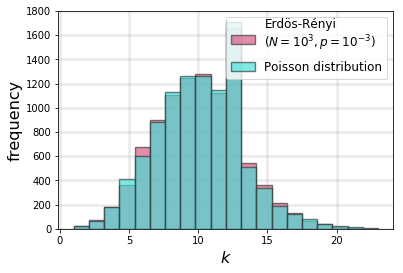

In [51]:
num_bins = 20

fig, ax = plt.subplots(1,1,figsize=(6,4))

g = nx.gnp_random_graph(N,p)
nd = np.array(list(dict(g.degree()).values()))
__ = ax.hist(nd, bins=num_bins, edgecolor='#333333', linewidth=1.4, color=cols[5],
             alpha=0.65, label='Erdös-Rényi\n($N=10^{3}, p=10^{-3}$)')

k = np.random.poisson(av_deg, size=N)
__ = ax.hist(k, bins=num_bins, edgecolor='#333333', linewidth=1.4, color=cols[6],
             alpha=0.65, label='Poisson distribution')

ax.legend(fontsize=12)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel("frequency", fontsize=16)

plt.savefig('figs/pngs/Pk_ER_vs_poisson.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/Pk_ER_vs_poisson.pdf', dpi=425, bbox_inches='tight')
plt.show()

## Generalized Random Graphs

The random graph paradigm of the Erdos–Renyi model can be extended to accommodate the construction of generalized random graphs with a predefined degree distribution by assigning the graph a fixed degree sequence ${k_i}$, $i = 1,\dots, N$: this is the __configuration model__.

In [52]:
# In NetworX this graphs can be generated using
from networkx.utils import powerlaw_sequence
N = 10**6
gammas = np.linspace(2.0,3.9,20)
powerlaw_dict = {gamma:nx.utils.powerlaw_sequence(N, gamma, seed=5) for gamma in gammas}

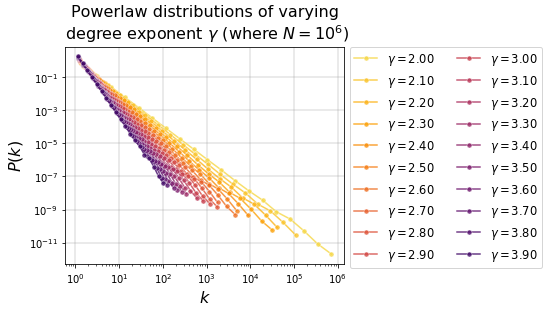

In [53]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

powerlaw_cols = plt.cm.inferno_r(np.linspace(0.1,0.8,len(gammas)))

for i,degree_sequence in enumerate(list(powerlaw_dict.values())):
    x,y = plot_degree(degree_sequence, number_of_bins=20, log_binning=True, base=2)
    nonzero_inds = np.nonzero(y)[0]
    
    ax.loglog(x[nonzero_inds], y[nonzero_inds], 'o-', markersize=5,
              color=powerlaw_cols[i], alpha=0.8, markeredgecolor='w',
              markeredgewidth=0.5,label='$\gamma=%.2f$'%gammas[i])
    
    ax.set_xlabel(r"$k$", fontsize=16)
    ax.set_ylabel(r"$P(k)$", fontsize=16)
    ax.grid(linewidth=2.0, color='#999999', alpha=0.2, linestyle='-')

ax.set_title('Powerlaw distributions of varying\n degree exponent $\gamma$ (where $N = 10^6$)',fontsize=16)
ax.legend(bbox_to_anchor=[1.0,1.025], fontsize=11.5, ncol=2)

plt.savefig('figs/pngs/powerlaw_exponent_examples.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/powerlaw_exponent_examples.pdf', dpi=425, bbox_inches='tight')
plt.show()

# Watts–Strogatz Model
In random graph models the clustering coefficient is determined by the imposed degree distribution and vanishes in the limit of very large graphs. Empirically, we observe very large clustering coefficients in many real-world networks.
The ___Watts-Strogatz model___ allows us to generate graphs with _high clustering_ but also _small average distances_ (Watts & Strogatz, 1998).

The model works as follow: 
1. $N$ vertices are positioned along a ring 
* Each vertex is then symmetrically connected to its 2m nearest neighbors (i.e. $\langle k \rangle = 2m$)
* For every vertex, each edge connected to a clockwise neighbor is randomly rewired with probability $p$, and preserved with probability $1− p$

In [57]:
ps = np.logspace(-4, 0, num=15)
p0 = ps[0]
n_graphs = 10
k = 10
N = 1000

cc_dict = dict(zip(ps, [[]]*len(ps)))
pl_dict = dict(zip(ps, [[]]*len(ps)))

# inits
cc0 = []
pl0 = []
for i in range(n_graphs):
    G = nx.watts_strogatz_graph(N, k, p0)
    cc0.append(nx.average_clustering(G))
    pl0.append(nx.average_shortest_path_length(G))

cc0 = np.mean(cc0)
pl0 = np.mean(pl0)

### Caution: this takes ~11 minutes

In [58]:
for i, p in enumerate(ps):
    cc_list = []
    pl_list = []
    for i in range(n_graphs):
        G = nx.watts_strogatz_graph(N, k, p)
        while not nx.is_connected(G):
            G = nx.watts_strogatz_graph(N, k, p)
        cc_list.append(nx.average_clustering(G))
        pl_list.append(nx.average_shortest_path_length(G))
        
    cc_dict[p] = np.mean(cc_list)    
    pl_dict[p] = np.mean(pl_list)

cc = dict(zip(ps, [0]*len(ps)))
pl = dict(zip(ps, [0]*len(ps)))

for p in ps:
    cc[p] = np.mean(cc_dict[p]) / cc0
    pl[p] = np.mean(pl_dict[p]) / pl0

Let us see how average clustering and average shortest path length vary with $p$:

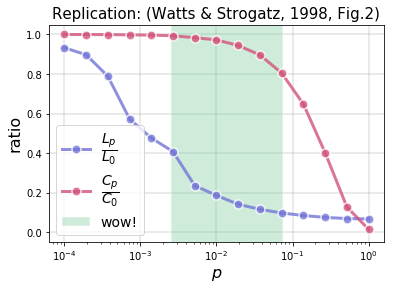

In [59]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.semilogx(ps, list(pl.values()), marker='o', markersize=9.0, color=cols[1],
          alpha=0.8, markeredgecolor='w',markeredgewidth=1.5, label=r'$\dfrac{L_{p}}{L_{0}}$', linewidth=3.0)
ax.semilogx(ps, list(cc.values()), marker='o', markersize=9.0, color=cols[-3],
          alpha=0.8, markeredgecolor='w',markeredgewidth=1.5, label=r'$\dfrac{C_{p}}{C_{0}}$', linewidth=3.0)

ax.fill_between([0.0025,0.075], -1, 2, label='wow!', facecolor=cols[4], 
                alpha=0.3, edgecolor='w', linewidth=2.0)
ax.set_xlabel(r"$p$", fontsize=16)
ax.set_ylabel("ratio", fontsize=16)
ax.grid(linewidth=2.0, color='#999999', alpha=0.2, linestyle='-')

ax.set_title('Replication: (Watts & Strogatz, 1998, Fig.2)',fontsize=15)
ax.legend(fontsize=14)

ax.set_ylim(-0.05,1.05)
plt.savefig('figs/pngs/Watts_Strogatz_Fig2.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/Watts_Strogatz_Fig2.pdf', dpi=425, bbox_inches='tight')
plt.show()

### Quick note about the above plot: it is arguably the reason all of us are in this room right now
__________

# Growing Networks

## Preferential Attachment Networks

All the methods we have considered so far employ a _static approach_ to generate networks. 
However, most of the real networks we are going to analyze during this class evolve over time.
Then, let us explore a model that employs a _dynamical approach_ to generate graphs: the ___Barabasi-Albert model___ (1999).

The main insight of this model is the following: in most real networks, new edges are not located at
random but tend to connect to vertices which already have a large number of connections ("_rich get richer_" / "_Matthew effect_")).

The model has two main underlying mechanism that come into play:
1. Network growth: the network starts with a small core of $m_0$ connected vertices and - at every time step - a new vertex is added, with $m$ edges ($m < m_0$) connected to old vertices in the system.
2. Each new edge is connected to the old vertex $i$ with a probability proportional to its degree $k_i$.

The Barabasi-Albert algorithm spontaneously evolve into a stationary power-law degree distribution with the form 
$P(k)\sim k^{-3}$:

$$ P(k) = 2m^2k^{-3}, $$

an average clustering coefficient equal to:

$$ \langle C \rangle_N = \frac{m}{8N}(\ln N)^2,$$

and an average shortest path length that scales as:

$$ \langle l \rangle_N \sim \frac{\log(N)}{\log\log(N)}.$$

Therefore, also in this case, the clustering is vanishing for $N$ that tends to infinity. However, the average shortest path length remains small even for large networks.

In [89]:
# In NetworkX we can generate the model using:
N = 100000
m = 3
ba = nx.barabasi_albert_graph(N,m)
degree_sequence = np.array(list(dict(ba.degree()).values()))

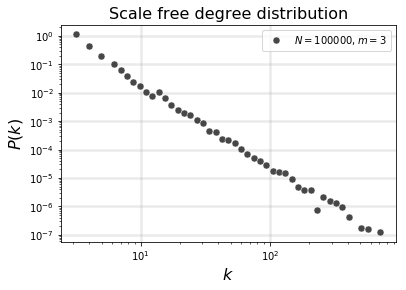

In [90]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

x,y = plot_degree(degree_sequence, number_of_bins=50, log_binning=True, base=2)

nonzero_inds = np.nonzero(y)[0]
ax.loglog(x[nonzero_inds], y[nonzero_inds], 'o', markersize=7,
          color='#333333', alpha=0.9, markeredgecolor='w',
          markeredgewidth=0.5, label='$N=%i, m=%i$'%(N,m))

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')
ax.set_title('Scale free degree distribution',fontsize=16)
ax.legend()

plt.savefig('figs/pngs/barabasi_albert_degreedist.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/barabasi_albert_degreedist.pdf', dpi=425, bbox_inches='tight')
plt.show()

In [91]:
# https://github.com/ivanvoitalov/tail-estimation
import powerlaw
from tail_estimation import *

In [92]:
data = degree_sequence
results = powerlaw.Fit(data,verbose=False)
print(results.power_law.alpha)
print(results.power_law.xmin)
dists = ['power_law', 'lognormal']
R, p = results.distribution_compare('power_law', 'lognormal')

3.0411137113969846
19.0


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [93]:
print("if the R value is less than 0.0 (here, R = %.4f), then %s is preferred"%(R,dists[1]))

if the R value is less than 0.0 (here, R = -1.0531), then lognormal is preferred


## But wait a second...
I thought that Barabasi-Albert networks were *by definition* scale free networks?? Why is a log-normal distribution fitting better than a powerlaw? (Note: the current output has a negative value for $R$, but with repeated simulations you may end up with a positive value.)

### Introducing: The Great Annoying Network Science Scandal of 2018 / 2019

Using the PLfit technique that was just shown above, Broido & Clauset (2019) published the bold __[Scale free networks are rare](https://www.nature.com/articles/s41467-019-08746-5)__ result, which resulted in a collective clusterfuck by the network science (online) community--[generating press](https://www.quantamagazine.org/scant-evidence-of-power-laws-found-in-real-world-networks-20180215/), [journal responses](https://www.nature.com/articles/s41467-019-09038-8), Twitter nonsense, etc.

Their main claim was that under certain categories of fit, powerlaw degree-distributions were not as prevalent as the last 20 years of screaming network scientists would have you believe. While there is reason to be skeptical of many claims of *"we found a powerlaw"*, the story might not be as cut-and-dry as the steak-themed title might suggest.

### More meat metaphors: Scale free networks well done

Meanwhile, recent work by Ivan Voitalov, Pim van der Hoorn, Remco van der Hofstad, Dmitri Krioukov--__[Scale free networks well done](https://arxiv.org/abs/1811.02071)__--questioned a key assumption that has gone relatively under-noticed since the original PLfit paper in 2007 by Aaron Clauset, Cosma Rohilla Shalizi, and Mark Newman (__[Power-law distributions in empirical data](https://arxiv.org/abs/0706.1062)__). Using maximum likelihood estimation and KS tests, they fit powerlaw exponents to data and can use this estimate to evaluate whether or not a powerlaw is the best fit for your network.

That's why it's odd to see the lack of statistical support for the network above... it is literally a scale free network. If PLfit doesn't judge that to be scale free, then something must be up. The issue comes down to this key misunderstanding about the definition of scale-free networks---it's that we often assume the following:

$$ P(k) \sim Ck^{-\gamma} \equiv P(k) \approx Ck^{-\gamma} $$ 

Scale-freeness comes from the fact that the degree distribution is a power-law. The problem with assuming $ P(k) \approx Ck^{-\gamma} $ is that we neglect the fact that there is __an entire family of *regularly-varying distributions* that produce power laws__ and that fitting our networks' degree distributions with the assumption that they were generated by a process that creates pure, pristine, Pareto-distributed __is not a valid assumption__.

In fact, the MLE + KS approach was recently proven to be consistent for these "clean" power laws only (Drees et al, 2018). Instead, a better approach is to use the following:

$$ P(k) = l(k)k^{-\gamma} $$ 

where $l(k)$ can encode a lot of the "impurities associated with real data. What's more is that we know from __Extreme Value Theory__ what $l(k)$ should look like! It is from the Fréchet family of distributions, which can be expressed as:

$$ \xi = \dfrac{1}{\gamma-1} $$

Try __[this method](https://github.com/ivanvoitalov/tail-estimation)__ out for yourself.

## The Network Zoo (phrase from Young et al., 2018)
Phrase from Young et al., 2018. 

Below are several instantiations of networks grown under a preferential attachment mechanism where new nodes attach their $m$ edges to nodes already in the graph with probability:

$$ \Pi_i = \dfrac{k_i^{\alpha}}{\sum_i k_i^{\alpha}} $$

In [1]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    sublinear, linear, or superlinear preferential attachment
    """
    G = nx.Graph()
    G.add_edge(0,1)
    for node_i in range(2,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(G.number_of_nodes(), size=(m,), replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)
    
    return G

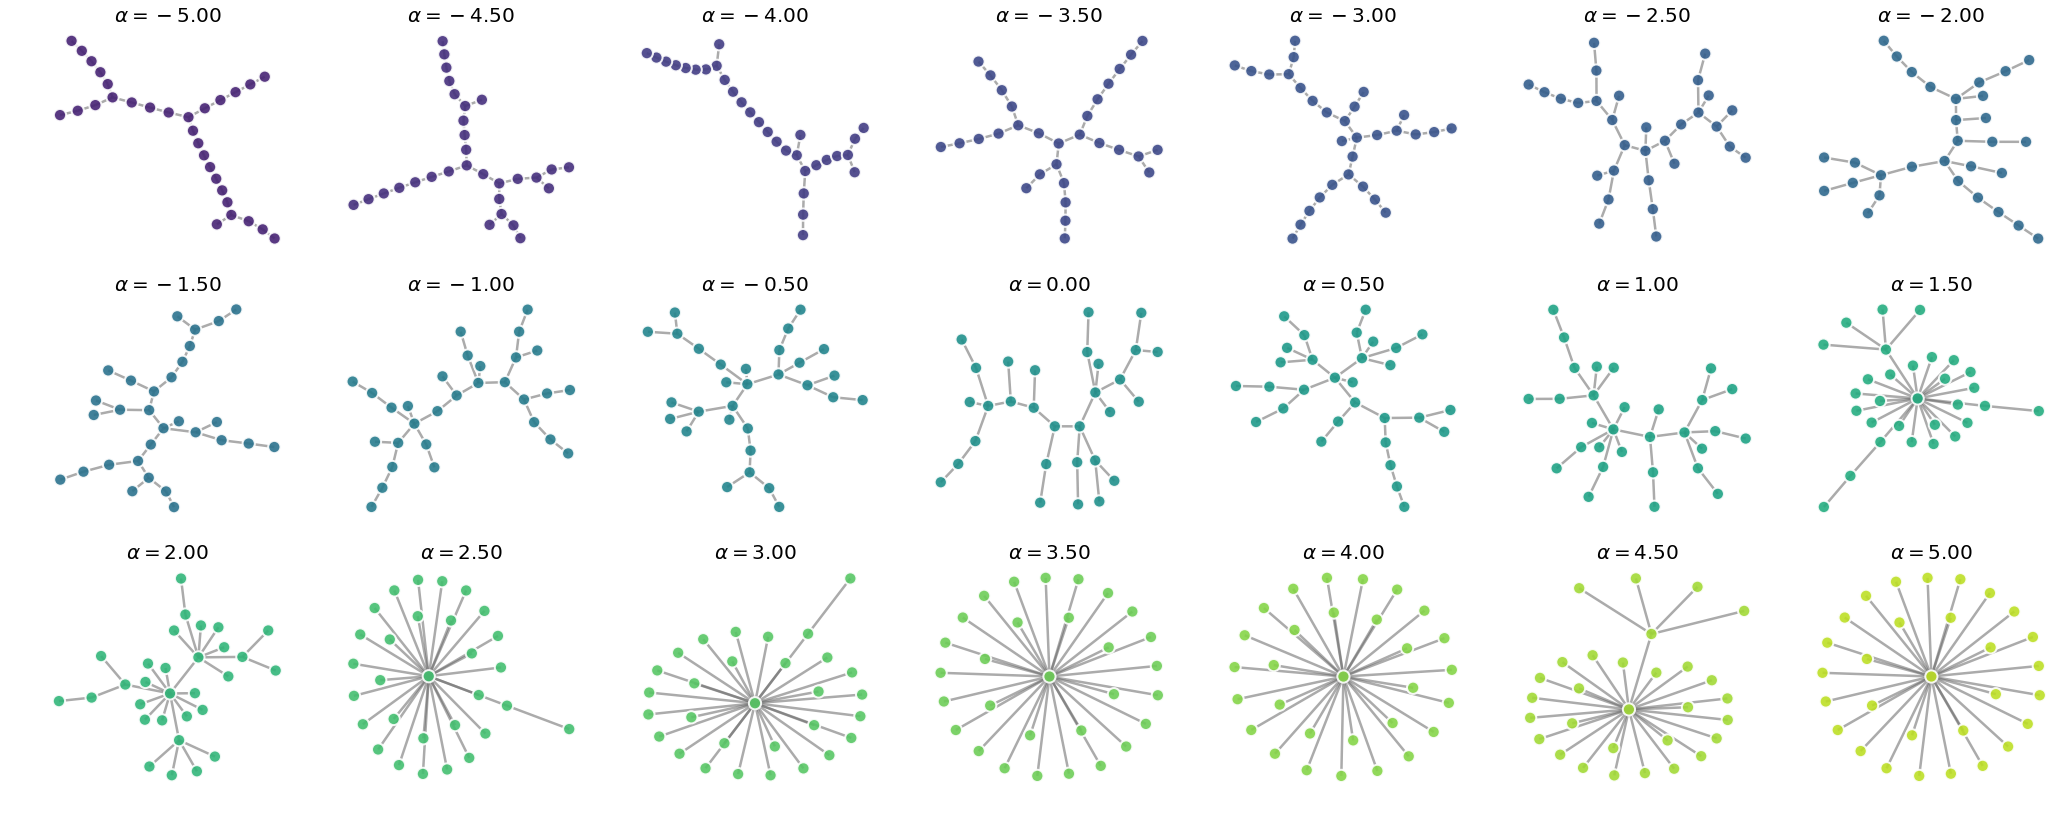

In [22]:
fig, ax = plt.subplots(3,7,figsize=(36,14))

tups=[(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), 
      (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), 
      (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)]
      
N = 30
m = 1
alphas = np.linspace(-5,5,len(tups))
colors = plt.cm.viridis(np.linspace(0.1,0.9,len(tups)))

for ix, alpha in enumerate(alphas):
    G = preferential_attachment_network(N,alpha,m)
    q = tups[ix]
    pos = nx.kamada_kawai_layout(G)
    
    nx.draw_networkx_nodes(G, pos, node_color=[colors[ix]]*N, node_size=150, linewidths=2.0,
                           alpha=0.9, edgecolors='w', ax=ax[q])
    nx.draw_networkx_edges(G, pos, edge_color='#666666', width=2.5, alpha=0.55, ax=ax[q])

    ax[q].set_title(r"$\alpha=%.2f$"%alpha,fontsize=20)
    ax[q].set_axis_off()
    
plt.savefig('figs/pngs/preferential_attachment_alpha.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/preferential_attachment_alpha.pdf', dpi=425, bbox_inches='tight')
plt.show()

______________

# Communities 

## (Just use SBMs nowadays--although, the descriptions and methods below are helpful in forming an intuition as to why SBMs are as useful as they are)

So far, we have seen that real networks typically display fat tailed degree distributions. However, it is not only the distribution of the node degrees that is heterogenenous but also how the actual connectivity of each individual node is distributed among its neighbors. In particular, we observe that _communities_ or _clusters_ of nodes appear in real network data where specific groups of vertices tend to have an higher level of connectivity between themselves than with the rest of the nodes in the graph.

#### Possible Applications
We may want to be able to find network communities for several reasons:
* distribute scarce resources (e.g. parallel computing)
* explore the hierarchical structure of a graph (e.g. protein-protein interactions, firms, etc..)
* filter a network
* target different groups of people (e.g. "you might know XYZ", "people who bought this also bought", etc..)
* discover the roles of nodes within the network topology

### Definitions
___Graph clustering___ is an intuitive concept but essentially ill-defined. Communities or clusters of nodes can be defined using different definitions and also the quality of a given partitioning scheme can be evaluated in different ways.

Notice that _graph clustering_ is intrinsically different than _data clustering_: 
* in graph clustering, the network has to be ___sparse___: i.e. if the edge distribution is too homogenous, talking about communities does not make sense;
* if the graph is ___dense___ (i.e. $M>>N$), we have to approach the problem from a slightly different angle, using techniques that are much closer to what is commonly used in data clustering problems. 

Remember, our aim is to find communities looking only at the ___structural information___ contained in the graph without considering group specific characteristics.

In general, we can think that a community is _well defined_ if we have relatively more edges ___within___ the community than ___between___ communities.

We can make this concept operational in the following way: let us denote with $G'$ a subgraph of $G$, with $N$ and $N'$ the number of nodes of $G$ and $G'$, respectively. Then we can define the ___internal degree___ $k_i^{int}$ and the ___external degree___ $k_i^{ext}$ of a generic node $i$ as :
* $k_i^{int} = $ number of connections with nodes in $G'$
* $k_i^{ext} = $ number of connections with nodes in $G$ but not in $G'$

Then, we can define the ___intra-cluster density___ $\delta_{int}(G')$ of the subgraph $G'$ as:

$$ \delta_{int}(G') = \frac{\sum_{i \in G'} k_i^{int} }{N'(N'-1)} ,$$

and we can define the ___inter-cluster density___ $\delta_{ext}(G')$ of the subgraph $G'$ as:

$$ \delta_{ext}(G') = \frac{\sum_{i \in G'} k_i^{ext} }{N'(N'-1)} $$

Then, for $G'$ to be a community we should have that $\delta_{int}(G')$ is greater than the density of the graph $G$ and $\delta_{ext}(G')$ is lower than the density of $G$.

Additionally, we expect that $G'$ is ___connected___.

A ___partition___ is a division of a graph into clusters, such that each vertex is assigned to one and only one cluster!

Instead, if a graph is divided into (possibly) overlapping subgraphs, we call this partitioning scheme a ___cover___.

Finding communities is difficult because the total number of possible partitions in which a graph be divided grows faster than the exponentially with the graph order $N$. I.e. it is impossible to enumerate and evaluate the quality of all possible partitions of a graph unless the graph is very small.

Notice also that partitions can be ___hierarchically ordered___: i.e. a community can contain a set of smaller communities.

We can naturally represent a hierarchically ordered graph using a ___dendrogram___:

### Quality functions

Provided that we can pick different algorithms/methods to identify partitions, we need a way to evaluate the quality of the communities found. Put it differently, how can we judge if a partition is good?

We can use a ___quality function___ to assign a score to each partition of a graph. Then we can ___rank partitions___ based on their score and pick the best solution.

Warning:
* this problem is still partially _ill-posed_
* the answer depends on the specific concept of community and/or quality function adopted

In general, a quality function is __additive__ if:
$$ Q(\mathbb{P}) = \sum_{\mathbb{C} \in \mathbb{P} } q(\mathbb{C}) $$

where $\mathbb{P}$ is a partition of $G$ and $\mathbb{C}$ is a community in $\mathbb{P}$.

#### Performance:
$$ P(\mathbb{P}) = \frac{\left|{(i,j) \in E, C_i = C_j}\right| + \left|{(i,j) \notin E, C_i \neq C_j}\right|}{N(N-1)/2} $$

#### Coverage:
$$ C(\mathbb{P}) = \frac{\left|{(i,j) \in E, C_i = C_j}\right|}{M} $$

#### Modularity:
$$ Q = \frac{1}{2M} \sum_{i,j} (A_{i,j} - P_{i,j}) \delta(C_i,C_j) $$

* Key idea: random graphs have no community structure!
* Then, we can compare the edge density in each cluster with the edge density of the cluster in a randomized version of the graph
* Put it differently, we compare the observed intra-cluster edge density with the one expected under the assumption that the model had no community structure but while keeping its structural properties

For example, one might consider as a null model an Erdos-Renyi graph where the probability of observing an edge is equal to $P_{i,j} = p = \frac{2M}{(N(N-1)}$.

However, as we already know, this is not a realistic assumption (i.e. degree distributions are generally not Poisson).

The standard null model of modularity imposes that the ___expected degree sequence___  matches the actual degree sequence of the graph (remember the ___configuration model___?).

Then, the probability to randomly pick a stub incident to $i$ is:
$$ p_i = \frac{k_i}{2M} .$$


It follows that the probability of nodes $i$ and $j$ to be randomly connected is:

$$ p_{i,j} = p_{i}p_{j} = \frac{k_i}{2M}\frac{k_j}{2M} ;$$

then, the expected number of edges between $i$ and $j$ is:

$$ P_{i,j} = 2M*p_{i}p_{j} = \frac{k_ik_j}{2M} .$$

Hence, the modularity becomes:

$$ Q = \frac{1}{2M} \sum_{i,j} \left(A_{i,j} - \frac{k_ik_j}{2M}\right) \delta(C_i,C_j) $$

Notice that only edges between nodes belonging to the same community affect the final computation of the modularity score. Therefore, we can rewrite the previous formula just in terms of the different clusters $\mathbb{C}$:

$$ Q = \sum_{\mathbb{C} \in \mathbb{P}} \left[ \frac{E_{\mathbb{C}}}{M} - \left( \frac{k_{\mathbb{C}}}{2M} \right)^2 \right] $$

where $E_{\mathbb{C}}$ denotes the total number of edges within each cluster $\mathbb{C}$ and $k_{\mathbb{C}}$ denotes the sum of the degrees of the nodes in $\mathbb{C}$.

Properties:
* Modularity can be negative (multipartite structure)
* Modularity in general depends on graph size
* Large values of modularity not necessarily indicate good partitions: random graphs may have high-modularity partitions
* If all the vertices are assigned to the same community, $Q = 0$
* $Q$ is always lower than 1


_________

## Traditional Methods
___Graph partitioning___ consists in dividing the vertices in $C$ groups of predefined size, such that the number of edges lying between the groups is minimal. The number of edges running between clusters is called ___cut size___.

Problems:
* We need to specify the number of clusters, otherwise we obtain the trivial solution
* We need to specify the size of the clusters, otherwise the most likely solution would be to separate the lowest degree vertex from the rest of the graph

Applications:
* Parallel computing
* Circuit partitioning and layout

One version of graph partitioning is ___graph bisectioning___ using the ___Kernighan-Lin___ algorithm:

1. Split the graph in two groups of predefined size
* At each step, a pair of nodes of different groups are swapped so to decrease the cut size
* Some moves increasing the cut size are accepted to avoid being trapped in local minima
* After a series of moves one picks the one which yielded the lowest cut size, which is used as starting point for a new iteration

One of the problems of this algorithm is that the results strongly dependent on the initial partition. However, this method is often used to improve the results of other community detection algorithms.

### Hierarchical clustering

At the heart of ___hierarchical clustering___ there is the definition of a similarity measure between vertices. After a measure is chosen, one computes the similarity for each pair of vertices and then assign nodes to different groups using two different types of algorithms:
1. ___Agglomerative algorithms___: clusters are iteratively merged if their similarity is sufficiently high;
2. ___Divisive algorithms___: clusters are iteratively split by removing edges connecting vertices with low similarity.

The definition of the ___similarity measure___ involves some arbitrariness in how to compute the similarity between two groups. Some of the most common hierarchical clustering methods to define similarity of clusters are:
* ___single linkage clustering___: the similarity between two groups is the minimum element $x_{i,j}$ of the similarity matrix $X$, with $i$ in one group and $j$ in the other;
* ___complete linkage clustering___: the similarity between two groups is the maximum element $x_{i,j}$ for vertices of different groups;
* ___average linkage clustering___: the similarity between groups is computed as the average of the $x_{i,j}$.

For performing hierarchical clustering in Python, please have a look at: http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html .

The main advantage of hierarchical clustering is that it does not require a preliminary knowledge on the number and size of the clusters. However, this is also its greatest weakness (i.e. a hierarchical structure is always found, by construction).

Hierarchical clustering is very frequently used in social network analysis, biology, engineering, marketing, etc.

### Partitional clustering

___Partitional clustering___ consists in finding clusters given a set of data points embedded in a metric space. 

Notice: we need to specify the ___number of clusters___ $k$ we want to find.

One popular method is ___k-means clustering___ that minimizes the total squared distance of each point from the centroid of the group it belongs to.

In the case of the ___Lloyd's algorithm___:
1. Initial random distribution of the centroids (possibly as far as possible from each other)
2. Each vertex is assigned to the nearest centroid
3. Centers of mass of clusters are computed
4. The centers of mass become the new centroids
5. Repeat from 2 until convergence

Limitations:
* we need to impose the number of clusters
* the embedding in a metric space might be rather artificial for some graphs
* dependence on initial conditions

### Spectral clustering

___Spectral clustering___ includes all techniques that partition a set of nodes into clusters by using the _eigenvalue decomposition_ of a matrix:
$$ A = Q\Lambda Q^{-1} ,$$
where $A$ is the original matrix, $Q$ is the matrix having in the columns the eigenvectors of $A$, and $\Lambda$ is the diagonal matrix containing the eigenvalues of $A$.

In our context, typically three versions of the ___Laplacian matrix___ of a graph are considered:
* Un-normalized Laplacian: $L = D - A$
* Symmetric Normalized Laplacian: $L_{sym} = D^{-1/2}LD^{-1/2}$
* Random Walk Normalized Laplacian: $L_{rw} = D^{-1}L = I - D^{-1}A = I - T$

The way in which those methods work is the following:
1. the $k$ eigenvectors associated to the $k$ lowest eigenvalues of the Laplacian matrix are computed
2. a new $N\times k$ matrix  $W$ is constructed: each column is one of the $k$ eigenvectors found at 1
3. the matrix might be transformed to be row stochastic (not all methods requires this step)
4. The rows of $W$ are vectors with $k$ components representing the vertices as points in an Euclidean space
5. Points are grouped in clusters via standard clustering methods (e.g. $k$-means clustering)

Properties of the Laplacian matrix:
* all eigenvalues are non negative
* if the graph is divided into $k$ components, than there are $k$ zero eigenvalues

## Girvan-Newman method
The ___Girvan-Newman method___ is a divisive algorithm that iteratively removes the edges connecting the different clusters until the optimal partition is found and the communities are fully isolated.

Edges are selected according to the values of measures of ___edge centrality___, estimating the importance of edges according to some property or process running on the graph. In particular, in the Girvan-Newman method we employ ___betweenness centrality___. 

___Edge betweenness___ computes the total number of shortest paths from any pair of vertices that cross the edge. If multiple geodesic paths exists between the same pair of vertices, the contribution of each path is divided by their multiplicity.

The algorithm works as follow:
1. Calculate the betweenness of all edges
2. Remove the one with highest betweenness
3. Recalculate the betweenness of the remaining edges
4. Repeat from 2 until no edges remain
5. Select the partition that give the highest modularity score 

### For example:

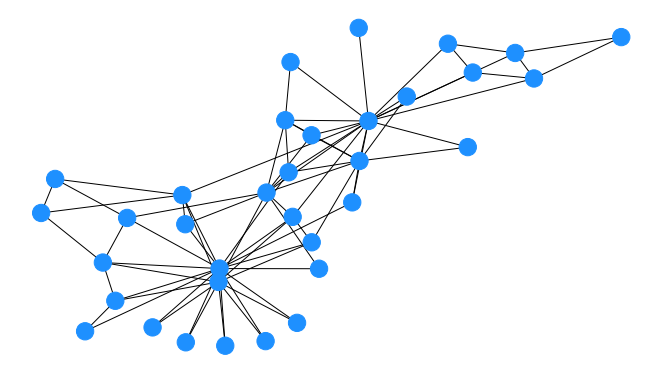

In [94]:
G = nx.karate_club_graph()
N = nx.number_of_nodes(G)
M = nx.number_of_edges(G)
plt.figure(figsize=(9,5))
pos = nx.spring_layout(G, seed=411)
ncs = ['dodgerblue' for i in G.nodes()]
nx.draw(G, pos, node_size=300, node_color=ncs)

In [95]:
# we know the "ground truth"
group_instructor = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
group_president = [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
ideal_partition = {}
for node in group_instructor:
    ideal_partition[node] = 0
for node in group_president:
    ideal_partition[node] = 1

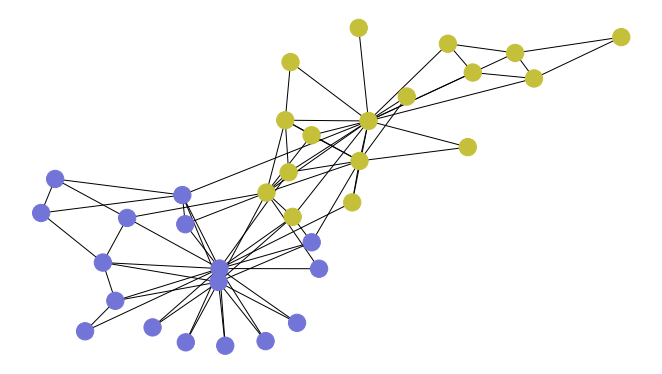

In [96]:
plt.figure(figsize=(9,5))
ncs = [cols[ideal_partition[node]] for node in G.nodes()]
nx.draw(G, pos, node_size=300, node_color=ncs)

In [97]:
from collections import defaultdict
def get_modularity(G, partition):
    E_c = defaultdict(float)
    k_c = defaultdict(float)
    M = float(G.number_of_edges())
    for source_node, target_node in G.edges():
        if partition[source_node] == partition[target_node]:
            E_c[partition[source_node]] += 1
    
    degrees = G.degree()
    for node in G.nodes():
        k_c[partition[node]] += degrees[node]
    
    Q = sum([(E_c[c]/M) - (k_c[c]/(2.0*M))**2 for c in k_c.keys()])
    
    
    return Q

In [98]:
get_modularity(G, ideal_partition)

0.3582347140039447

In [99]:
import operator
def girvan_newman(G):
    Q_max = -1.0
    H = G.copy()
    partition = {node:0 for node in G.nodes()}
    best_partition = partition.copy()
    
    while H.number_of_edges() > 0:
        edge_betweenness = nx.edge_betweenness(H)
        edge2remove = sorted(edge_betweenness.items(), key=operator.itemgetter(1), reverse=True)[0][0]
        H.remove_edge(*edge2remove)
        
        components = nx.connected_components(H)
        partition = {node:k for k,cluster in enumerate(components) for node in cluster}
        
        Q = get_modularity(G, partition)
        if Q > Q_max:
            Q_max = Q
            best_partition = partition.copy()
        
    return best_partition

In [100]:
gn = girvan_newman(G)

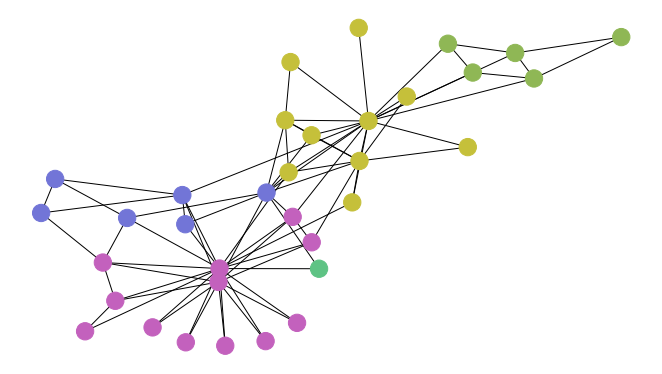

In [101]:
plt.figure(figsize=(9,5))
ncs = [cols[gn[node]] for node in G.nodes()]
nx.draw(G, pos, node_size=300, node_color=ncs)

______________

# Dynamical Processes on Networks

__WHAT IS A DYNAMICL PROCESS?__
* "a dynamical system is a system in which a function describes the time dependence of a point in a geometrical space" (Wikipedia)
* a mathematical hypothesis of process mechanisms
* matching observed process behavior
    * to predict how process responds to given input as a function of time
    * to control or to react


__WHY DO WE CARE?__
* how the traffic of packets unfold on the internet
* how we navigate the WWW
* how we communicate
* how we interact
* how pathogens spreads
* how ideas/memes spread
* how outages diffuse

__DYNAMICS ON TOP OF NETWORKS__
* The study of the structure of networks is the first fundamental step
* The second step is to connect network structure with network function
    * how the feature of networks affect dynamical processes unfolding on top of them?
    
__TWO MAIN TYPES__
* diffusive processes: random walks, traffic, flow of packets, cascading, etc..
* contagion processes: spreading of diseases, ideas, memes, social convention, etc..

__________________

## RANDOM WALK

### INTUITIVE DEFINITION
"Some one" walks randomly on a network...

More formally:
* A walker randomly stands on a node
* At each time step, the walker uniformaly selects a destination from the neighbor nodes
* Usually the walker can visit a node multiple times

So what?

Random walks explain the observed behaviors of many processes in many fields:
* economy: “the random walk hypothesis”
* genetics: population drift
* ecology: search path of a foraging animal
* finance: the price of a fluctuating stock
* physics: diffusion of particles in a medium
* computer science: ranking algorithms, crawling

Thus Random walk is a fundamental model for the recorded stochastic activity.

### FORMAL DEIFNITION
* Definition
    * Given an undirected graph $G = (V, E)$, with $n =| V |$ and $m =| E |$, a (natural) random walk is a stochastic process that starts from a given node, and then selects one of its neighbors uniformly at random to visit.
    * Let $p_i(t)$ is the probability that the walker is at node $i$ at time $t$.
    * So with the adjacency matrix $\mathbf{A}$, $$p_i(t) = \sum_j \frac{\mathbf{A}_{ij}}{k_j}p_j(t-1)$$
    
* Random walk is a Markov process: the future state is determined just by the present state

* The transition matrix $\mathbf{M}$ is defined as $$\mathbf{M}_{ij} = \frac{\mathbf{A}_{ij}}{k_j}$$
    * We assume the walker is walking on an UNDIRECTED network, os $A_{ij}$ is symmetric
    * How about $M_{ij}$?
    
* With the defined transition matrix: 
    * $$\mathbf{Mp} = \mathbf{p}$$
    * $\mathbf{p}$ is the stationary state of a Markov process, i.e., $\mathbf{p}_i$ is the probability of the walker being at a particular node $i$ as $t\rightarrow \infty$
    * As $t\rightarrow \infty$, 
    $$p_i(\infty) = \sum_j \frac{\mathbf{A}_{ij}}{k_j}p_j(\infty)$$ 
    * In matrix notation,
    $$\mathbf{p}=\mathbf{A}\mathbf{D}^{-1}\mathbf{p}$$ 
    
    $$(\mathbf{I} - \mathbf{A}\mathbf{D}^{-1})\mathbf{p}=\mathbf{0}$$
    
    $$(\mathbf{D}-\mathbf{A})\mathbf{D}^{-1}\mathbf{p}=\mathbf{0}$$
    
    $$\mathbf{L}\mathbf{D}^{-1}\mathbf{p} = \mathbf{0}$$
    
    $$\mathbf{D}^{-1}\mathbf{p} = a\mathbf{1}$$
    
    * In the end, we have
    $$\mathbf{p} = a\mathbf{D}\mathbf{1}$$
    
    * What about the constant $a$?
    $$\sum_i p_i = 1$$
    and
    $$\sum_i p_i = a \sum_i k_i$$
    so
    $$a = \frac{1}{\sum_i k_i}$$
    
    * Thus:
    $$p_i = \frac{k_i}{\sum_j k_j}$$
    
    * The probability of finding the walker is a node is directly proportional to its degree
    
    or 
    
    * In other words, the fraction of time spent at a node is directly proportional to the degree of node....
    
More strictly,

Given an irreducible and aperiodic graph with a set of nodes $N$
and a set $E$ of edges, the probability of being at a particular
node $i$ converges to the stationary distribution
$$p_i = \frac{k_i}{2|E|}$$


### IMPORTANT MEASURES OF RANDOM WALK
#### _Mixing Rate_ and _Mixing Time_
    * Mixing Rate: measures how fast the random walk converges to the Stationary Distribution (Steady State). 
    * Mixing Time: the number of time steps that the random walk nees to converge to the Stationary Distribution

In [102]:
import random as random

# this will be a recursive function
def random_walk_recursion(G, source, stop, t, nt):
    # we now only have one walker
    nt[t] = source
    if t < stop:
        neighbors = G.neighbors(source)
        target = random.choice(neighbors)
        
        random_walk_recursion(G, target, stop, t+1, nt)

# Heterogenity of networks

The functional form of statistical distributions characterizing (large-scale) networks defines two network classes:

1. statistically __homogeneous__ networks:

    * the distributions have function forms with fast decaying or 'light' tails (e.g., Gaussian, Poisson)


2. statistically __heterogeneous__ networks:

    * the distributions have skewed or 'heavy' tail form (e.g., power-law)
    

Let $P(k)$ be the degree distribution of a network,

The average value (1st moment):
$$\langle k \rangle = \sum_k k P(k)$$

The average is a must to describe a distribution, not not enough:
* absence of a characteristic scale

The $n$-th momement:
$$\langle k^n \rangle = \sum_k k^n P(k)$$

The variance of the distribution (2nd moment):
$$\sigma^2 = \sum_x=k (k -\langle k \rangle )^2 P(k) = \langle k^2 \rangle - \langle k \rangle^2$$

__large variance $\rightarrow$ large heterogenity__

__The level of heterogenity__ is defined as:
$$\kappa = \frac{\langle k^2 \rangle}{\langle k \rangle}$$

for Poisson distribution:
$$\langle k \rangle = \sigma^2$$

for power-law distribution:
$$P(k) \sim k^{-\gamma}$$
so
$$\langle k \rangle = \int_{k_{min}}^{\infty} kP(k) dk = \int_{k_{min}}^{\infty} k^{1-\gamma} dk = c\frac{1}{2-\gamma}k^{2-\gamma}\bigr|^{\infty}_{k_{min}}$$
(defined just if $\gamma > 2$)

and 
$$\langle k^2 \rangle = \int_{k_{min}}^{\infty} k^2 P(k) dk = \int_{k_{min}}^{\infty} k^{2-\gamma} dk = c\frac{1}{3-\gamma}k^{3-\gamma}\bigr|^{\infty}_{k_{min}}$$
(defined just if $\gamma > 3$)

SO, for power-law distribution with $2<\gamma\leq 3$, the average degree is well defined and bounded, BUT the variance is divergent.

_________________

# Epidemic Spreading Models

A long tradition in applied mathematics

* Bernoulli 1760 first studies to understand the effectiveness of inoculation against smallpox

* One of the cornerstone works to achieve success in this method was done by Kermack and McKendrick in 1927


Epidemic models attempt to capture the dynamics in the spreading of a disease 

The models can be extended to understand spreading phenomea of idea, computer virus, product adoption, etc.


Central questions they try to answer are:

* How do contagions spread in populations?

* Will a disease become an epidemic?

* Who are the best people to vaccinate?

## Basic concepts

I . population divided in compartments according to the disease status:

* Susceptibles (S)
* Latent (L)
* Infectious (I)
* Recovered (R)
* many others, depending on the disease other study

Note: population could be either constant or varying over time

II. Transition between compartments

Two main types:
* “Interactive” or "Contagion" transitions

    * Susceptibles can only get infection by interacting with infectious (S + I -> 2I)
    
* “Spontaneous” transitions
    
    * Infectious can get recovered by themselves (no interaction) (I -> R)

III. Modeling the infection process

* Intuitively it should be function of

    * the number of infected individuals in the population
    
    * the probability of infection given an infected contact 
    
    * the number of such contacts

III. Homogenous mixing

We could first assume a full mixing population (good approximation for some diseases)
* every individual in the population has an equal chance of coming into contact with others

Force of infection ($\lambda$)

* the per capita rate at which susceptible individuals acquire an infectious disease

    $$\lambda = \frac{\mathrm{the\; number\; of\; infections}}{\mathrm{the\; number\; of\; susceptible\; person\; exposed}\times\mathrm{duration\; of\; exposed}}$$
    

* mass-action law

* suppose:
    * $N$ is the total population
    
    * $I$ is the number of infections
    
    * $\beta$ is the transmission rate ($\beta^{-1}$ the period of infection)
    
    * the force of infection $$\lambda = \beta\frac{I}{N}$$
    
IV. In heterogenous networks

* relax the well mixed approximation

* consider explicitly a connectivity network $G$

* degree class approximation (annealed approximation)

In [103]:
import random

compartments = {'S':list(), 'I':list()}
transmissions = {'S': ('I', 'contagion', 'beta')}
params = {'beta': 0.02}

#initialize the populaiton
susceptible_compartment = 'S'
infectious_compartment = 'I'

def epidemic_model(N, seed_num, T, compartments, transmissions, params):
    
    # first initialize the seed_num to that many in N
    for cmpt in compartments.keys():
        
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
    
    t = 1
    while t < T:
        for cmpt_from, trans in transmissions.items():
            
            cmpt_to = trans[0]
            trans_type = trans[1]
            
            if trans_type == 'contagion':
                
                prob = params[trans[2]] * compartments[cmpt_to][t-1] / float(N)
                delta = np.random.binomial(compartments[cmpt_from][t-1], prob)
                
                compartments[cmpt_from].append(compartments[cmpt_from][t-1] - delta)
                compartments[cmpt_to].append(compartments[cmpt_to][t-1] + delta)
                
            
            t += 1

In [104]:
N = 1000
seed_num = 5
T = 500
epidemic_model(N, seed_num, T, compartments, transmissions, params)

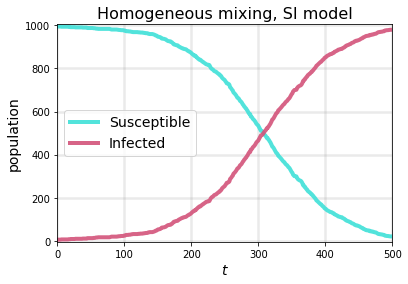

In [105]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(range(T), compartments['S'], c=cols[-2], linewidth=4.0, alpha=0.9, label='Susceptible') 
ax.plot(range(T), compartments['I'], c=cols[-3], linewidth=4.0, alpha=0.9, label='Infected') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T)
ax.set_ylim(-5,N+5)
ax.set_title("Homogeneous mixing, SI model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.show() 

__________________

### SI model on networks
#### I. for _homogeneous_ networks:

$$\frac{di}{dt} = \beta \langle k \rangle (1-i) i$$

so the analytical solution is

$$i(t) = \frac{1}{1 + (1-i_0) e^{-\beta \langle k \rangle t}}$$


#### II. for _heterogeneous_ networks:

using degree class approximation, i.e., for each degree $k$,

$$s_k=\frac{S_k}{N_k} \quad i_k=\frac{I_k}{N_k}$$

and

$$i = \sum_k P(k)i_k \quad s = \sum_k P(k)s_k$$


$$\frac{di_k}{dt} = \beta (1-i_k) k \Theta_k(t)$$

where $\Theta_k$ is __the density of intected neighbors of nodes with degree $k$.__

i.e., $\Theta_k$ is the probability to find an infected node following a randomly chosen edge.

so $$\Theta_k = \sum_{k'}P(k'|k)i_{k'}$$

For uncorrelated networks, $$P(k'|k)=\frac{k'P(k')}{\langle k \rangle}$$
so
$$\Theta_k(t) = \Theta(t) = \frac{\sum_{k'}k'P(k')i_{k'}}{\langle k \rangle}$$

In early time, $1-i_k(t) \approx 1$, so $$\frac{di_k}{dt} = \beta k \Theta_k(t)$$

combing all the above, there is $$i_k(t) = i(0) \Big [1 + \frac{k(\langle k \rangle - 1)}{\langle k^2 \rangle - \langle k \rangle} (e^{t/\tau} - 1)\Big ]$$

where $$\tau = \frac{\langle k \rangle}{\beta(\langle k^2 \rangle - \langle k \rangle)}$$

=> __exponential growth__

In [106]:
transmissions = {'S': ('I', 'contagion', 'beta')}
susceptible_compartment = 'S'
infectious_compartment = 'I'

def epidemic_model_network(G, compartments, seed_num, T, transmissions, params):
    N = G.number_of_nodes()
    
    # first initialize the seed_num to that many in N
    for cmpt in compartments.keys():    
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
    
    for node in G.nodes():
        G.node[node]['status'] = susceptible_compartment
        G.node[node]['next_status'] = None
        
    init_seeed_nodes = random.sample(G.nodes(), seed_num)
    for node in init_seeed_nodes:
        G.node[node]['status'] = infectious_compartment
        
    # all of the above was just for initialization
    # now we do the dynamical process
    
    for t in range(1,T):
        for n in G.nodes():
            neighbors = G.neighbors(n)
            n_status = G.node[n]['status']
            try:
                transition        = transmissions[n_status]
                new_status        = transition[0] # see the tuple above
                transmission_type = transition[1]
                transmission_rate = params[transition[2]]
                
                if transmission_type == 'contagion':
                    for nj in neighbors:
                        if G.node[nj]['status'] == new_status:
                            if random.uniform(0,1) < transmission_rate:
                                G.node[n]['next_status'] = new_status
                                break
            except KeyError:
                pass
            
        # update the compartment information
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)
        for n in G.nodes():
            if G.node[n]['next_status']:
                G.node[n]['status'] = G.node[n]['next_status']
                G.node[n]['next_status'] = None
            compartments[G.node[n]['status']][t] += 1

In [107]:
G = nx.barabasi_albert_graph(1000,2)
seed_num = 5
T = 100

params = {'beta': 0.05}
compartments = {'S':list(), 'I':list()}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

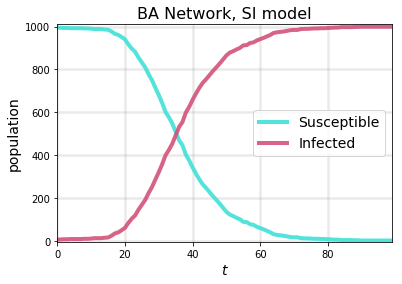

In [109]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(range(T), compartments['S'], c=cols[-2], linewidth=4.0, alpha=0.9, label='Susceptible') 
ax.plot(range(T), compartments['I'], c=cols[-3], linewidth=4.0, alpha=0.9, label='Infected') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("BA Network, SI model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/BA_network_SI.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/BA_network_SI.pdf', dpi=425, bbox_inches='tight')
plt.show() 

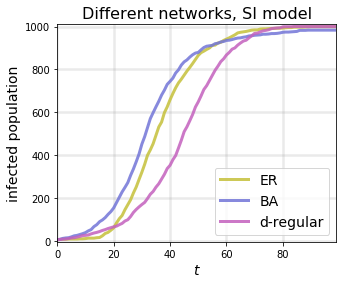

In [110]:
# Does the network structure matter?
N = G.number_of_nodes()
avg_k = 2.*G.number_of_edges()/N

G_R = nx.random_regular_graph(int(round(avg_k)), N)
compartments_R = {'S':list(), 'I':list()}
epidemic_model_network(G_R, compartments_R, seed_num, T, transmissions, params)

G_er = nx.erdos_renyi_graph(N, avg_k/N)
compartments_er = {'S':list(), 'I':list()}
epidemic_model_network(G_er, compartments_er, seed_num, T, transmissions, params)


fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['I'],   c=cols[0], linewidth=3.0, alpha=0.85, label='ER') 
ax.plot(range(T), compartments_er['I'],c=cols[1], linewidth=3.0, alpha=0.85, label='BA') 
ax.plot(range(T), compartments_R['I'], c=cols[3], linewidth=3.0, alpha=0.85, label='d-regular') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('infected population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("Different networks, SI model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/different_networks_SI.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/different_networks_SI.pdf', dpi=425, bbox_inches='tight')

plt.show() 

_____________________

## SIS model
add a recovery process, but no permanent immunization

### SIS model in homogeneous population

$$
\begin{align*}
S(t+dt) \; =& \; S(t) - \beta S(t)\frac{I(t)}{N}dt + \mu I(t)dt\\
I(t+dt) \; =& \; I(t) + \beta S(t)\frac{I(t)}{N}dt - \mu I(t)dt \\
\end{align*}
$$

equivalently,

$$
\begin{align*}
d_t s(t) \; =& \; - \beta s(t)i(t) + \mu i(t)\\
d_t i(t) \; =& \; \beta s(t)i(t) - \mu i(t) \\
\end{align*}
$$

In early time, 
* the number of infectious is small with respect to the population size ($s \sim 1, i \sim 0$)
* so we can linearize the equation $$d_{t}i = \beta i - \mu i = (\beta - \mu) i$$
* so we have an __epidemic threshold__ $$\beta - \mu > 0 \quad \mathrm{or} \frac{\beta}{\mu}>1$$

Basic reproductive number
* central concept in epidemiology
* the average number of secondary infections generated by a initial infection in a fully uninfected
population
* it is expression depends on the details of the disease
* for SIS model $$R_0 = \frac{\beta}{\mu}$$

The analytical solution: $$i(t) = \frac{\beta - \mu}{\beta + c e^{-\mu(R_0 -1)t}}$$

if $R_0<1$, $$i(\infty) = 0$$

if $R_0>1$, $$i(\infty) = 1 - \frac{1}{R_0}$$
(endemic state)

In [111]:
#let's define the model
transmissions = {'S' : ('I', 'contagion', 'beta'), 
                 'I' : ('S', 'spontaneous', 'mu')}

params = {'beta' : 0.2,
          'mu' : 0.1}

susceptible_compartment = 'S'
infectious_compartment = 'I'

def epidemic_model(N, seed_num, T, compartments, transmissions, params):
    
    # first initialize the seed_num to that many in N
    for cmpt in compartments.keys():
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
            
    t = 1
    while t < T:
        for cmpt_from, trans in transmissions.items():
            
            cmpt_to = trans[0]
            trans_type = trans[1]
            
            if trans_type == 'contagion':
                prob = params[trans[2]] * compartments[cmpt_to][t-1] / float(N)
            
            else:
                prob = params[trans[2]]
                
            delta = np.random.binomial(compartments[cmpt_from][t-1], prob)
            compartments[cmpt_from].append(compartments[cmpt_from][t-1] - delta)
            compartments[cmpt_to].append(compartments[cmpt_to][t-1] + delta)
            
            t += 1


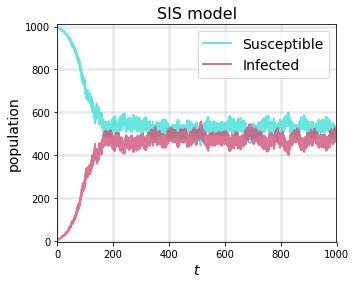

In [112]:
N = 1000
seed_num = 5
T = 1000

compartments = {'S': list(),'I': list()}
epidemic_model(N, seed_num, T, compartments, transmissions, params)


fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T+1), compartments['S'], c=cols[-2], linewidth=2.0, alpha=0.8, label='Susceptible') 
ax.plot(range(T+1), compartments['I'], c=cols[-3], linewidth=2.0, alpha=0.8, label='Infected') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("SIS model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')


plt.savefig('figs/pngs/homogeneous_SIS.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/homogeneous_SIS.pdf', dpi=425, bbox_inches='tight')
plt.show() 

### SIS model on networks

for hetergenous networks, as the above,

$$\frac{di_k}{dt} = -\mu i_k + \beta (1-i_k) k \Theta_k(t)$$

In the stationary state,
$$\frac{di_k}{dt}=0$$
so
$$i_k = \frac{k\beta\Theta}{\mu + k\beta\Theta}$$
__ the higher the node connectivity, the higher the probability to be infected__

and $$\Theta=\frac{1}{\langle k \rangle} \sum_k kP(k)\frac{\beta k \Theta}{\mu+\beta k \Theta}$$

We need non-zero solution for $\Theta$ so that $i_k > 0$ when $t\rightarrow\infty$

(Geometrical) solution of epidemic threshold: $$R_0 = \frac{\beta}{\mu} > \frac{\langle k \rangle}{\langle k^2 \rangle}$$

In [113]:
def epidemic_model_network(G, compartments, seed_num, T, transmissions, params):
    N = G.number_of_nodes()
    
    for cmpt in compartments.keys():    
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
    
    for node in G.nodes():
        G.node[node]['status'] = susceptible_compartment
        G.node[node]['next_status'] = None
        
    init_seeed_nodes = random.sample(G.nodes(), seed_num)
    for node in init_seeed_nodes:
        G.node[node]['status'] = infectious_compartment
        
    for t in range(1,T):
        for n in G.nodes():
            neighbors = G.neighbors(n)
            n_status = G.node[n]['status']
            
            try:
                transition        = transmissions[n_status]
                new_status        = transition[0] 
                transmission_type = transition[1]
                transmission_rate = params[transition[2]]
                
                if transmission_type == 'contagion':
                    for nj in neighbors:
                        if G.node[nj]['status'] == new_status:
                            if random.uniform(0,1) < transmission_rate:
                                G.node[n]['next_status'] = new_status
                                break
                else:
                    if random.uniform(0,1) < transmission_rate:
                        G.node[n]['next_status'] = new_status
                        
            except KeyError:
                pass
            
        # update the compartment information
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)
        for n in G.nodes():
            if G.node[n]['next_status']:
                G.node[n]['status'] = G.node[n]['next_status']
                G.node[n]['next_status'] = None
            compartments[G.node[n]['status']][t] += 1

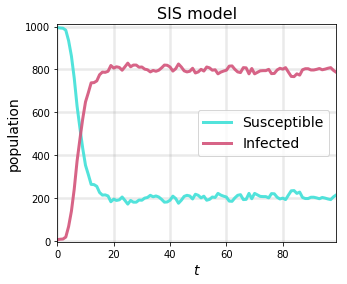

In [114]:
N = 1000
seed_num = 5
T = 100
transmissions = {'S' : ('I', 'contagion', 'beta'), 
                 'I' : ('S', 'spontaneous', 'mu')}

params = {'beta' : 0.2,
          'mu' : 0.10}

compartments = {'S': list(),'I': list()}

susceptible_compartment = 'S'
infectious_compartment = 'I'


epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['S'], c=cols[-2], linewidth=3.0, alpha=0.9, label='Susceptible') 
ax.plot(range(T), compartments['I'], c=cols[-3], linewidth=3.0, alpha=0.9, label='Infected') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("SIS model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/BA_network_SIS.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/BA_network_SIS.pdf', dpi=425, bbox_inches='tight')
plt.show()

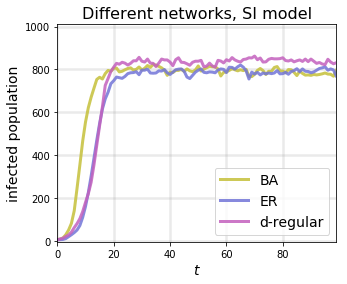

In [115]:
N = 1000
seed_num = 5
T = 100
transmissions = {'S' : ('I', 'contagion', 'beta'), 'I' : ('S', 'spontaneous', 'mu')}
params = {'beta' : 0.2, 'mu' : 0.10}

G = nx.barabasi_albert_graph(1000,2)
compartments = {'S': list(),'I': list()}

N = G.number_of_nodes()
avg_k = 2.*G.number_of_edges()/N

G_er = nx.erdos_renyi_graph(N, avg_k/N)
compartments_er = {'S': list(),'I': list()}

G_R = nx.random_regular_graph(int(round(avg_k)), N)
compartments_R = {'S': list(),'I': list()}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)
epidemic_model_network(G_R, compartments_R, seed_num, T, transmissions, params)
epidemic_model_network(G_er, compartments_er, seed_num, T, transmissions, params)

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['I'],   c=cols[0], linewidth=3.0, alpha=0.85, label='BA') 
ax.plot(range(T), compartments_er['I'],c=cols[1], linewidth=3.0, alpha=0.85, label='ER') 
ax.plot(range(T), compartments_R['I'], c=cols[3], linewidth=3.0, alpha=0.85, label='d-regular') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('infected population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("Different networks, SI model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/different_networks_SIS.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/different_networks_SIS.pdf', dpi=425, bbox_inches='tight')

plt.show() 

_____

## SIR model
we add a recovery process, permanent immunized

### SIR model in homogeneous population
$$
\begin{align*}
d_t s(t) \; =& \; - \beta s(t)i(t) \\
d_t i(t) \; =& \; \beta s(t)i(t) - \mu i(t) \\
d_t r(t) \; =& \; \mu i(t)
\end{align*}
$$

In early time
* the number of infectious is small respect to the population size ($s \sim 1$, $i \sim 0$)
* we can linearize the equation $$d_{i}t = \beta i - \mu i = (\beta - \mu) i$$
* so we have an __epidemic threshold__ $$\beta - \mu > 0 \qquad \mathrm{or} \qquad R_0=\frac{\beta}{\mu}>1$$

What happens in the long run (asymptotically?)
$$\frac{ds}{dr} = -\beta \frac{s}{\mu} = -R_0 s$$

so
$$s(t)=s(0)e^{-R_0 r(t)}$$

as $t\rightarrow\infty$
$$i(\infty) = 0, \qquad s(\infty) = 1 - r(\infty)$$

so with $s(0)\approx 1$
$$1-r(\infty) = e^{-R_0 r(\infty)} \qquad \mathrm{or} \qquad 1-r(\infty) - e^{-R_0 r(\infty)} = 0$$

Numerical solution to this suggests that for large $R_0$, say
$R_0$ > 5, virtually everyone in a well mixed population will
eventually be infected.


If $R_0$ is close to $1$, 
$$1-r(\infty) = e^{-R_0 r(\infty)} \approx 1 - R_0 r(\infty) + \frac{R_0^2}{2}r(\infty)^2$$
so
$$r(\infty) \approx 2\frac{R_0 - 1}{R_0^2}$$

In [116]:
def epidemic_model(N, seed_num, T, compartments, transmissions, params):
    for cmpt in compartments.keys():
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
    t = 1
    while t < T:
        for cmpt in compartments.keys():
            compartments[cmpt].append(compartments[cmpt][t-1])
            
        for cmpt_from, trans in transmissions.items():
            cmpt_to = trans[0]
            trans_type = trans[1]
            
            if trans_type == 'contagion':
                prob = params[trans[2]] * compartments[cmpt_to][t-1] / float(N)
            
            else:
                prob = params[trans[2]]
                
            delta = np.random.binomial(compartments[cmpt_from][t-1], prob)
            compartments[cmpt_from][t] -= delta
            compartments[cmpt_to][t] +=delta
            
        t += 1

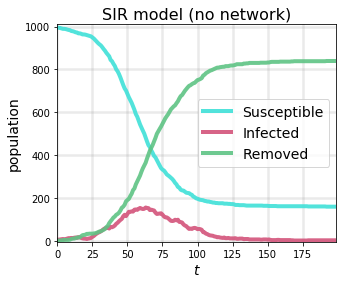

In [117]:
#let's define the model
transmissions = {'S' : ('I', 'contagion', 'beta'), 
                 'I' : ('R', 'spontaneous', 'mu')}

params = {'beta' : 0.2, 'mu' : 0.1}
                 
compartments = {'S': list(),'I': list(),'R': list()}

N = 1000
seed_num = 5
T = 200

epidemic_model(N, seed_num, T, compartments, transmissions, params)        


fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['S'], c=cols[-2], linewidth=4.0, alpha=0.9, label='Susceptible') 
ax.plot(range(T), compartments['I'], c=cols[-3], linewidth=4.0, alpha=0.9, label='Infected') 
ax.plot(range(T), compartments['R'], c=cols[-4], linewidth=4.0, alpha=0.9, label='Removed') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("SIR model (no network)", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/homogeneous_SIR.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/homogeneous_SIR.pdf', dpi=425, bbox_inches='tight')
plt.show()

### SIR model on network

similar arguments to SIS model on hetergeneous networks, but with slightly different solution for the epidemic threshold:

$$R_0 = \frac{\beta}{\mu} > \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$$

In [118]:
def epidemic_model_network(G, compartments, seed_num, T, transmissions, params):
    N = G.number_of_nodes()
    for cmpt in compartments.keys():    
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else: 
            compartments[cmpt].append(0)
    
    for node in G.nodes():
        G.node[node]['status'] = susceptible_compartment
        G.node[node]['next_status'] = None
        
    init_seeed_nodes = random.sample(G.nodes(), seed_num)
    for node in init_seeed_nodes:
        G.node[node]['status'] = infectious_compartment
        
    for t in range(1,T):
        for n in G.nodes():
            neighbors = G.neighbors(n)
            n_status = G.node[n]['status']
            
            try:
                transition        = transmissions[n_status]
                new_status        = transition[0] 
                transmission_type = transition[1]
                transmission_rate = params[transition[2]]
                
                if transmission_type == 'contagion':
                    for nj in neighbors:
                        if G.node[nj]['status'] == new_status:
                            if random.uniform(0,1) < transmission_rate:
                                G.node[n]['next_status'] = new_status
                                break
                elif transmission_type == 'spontaneous':
                    if random.uniform(0,1) < transmission_rate:
                        G.node[n]['next_status'] = new_status
                        
            except KeyError:
                pass
            
        # update the compartment information
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)
        for n in G.nodes():
            if G.node[n]['next_status']:
                G.node[n]['status'] = G.node[n]['next_status']
                G.node[n]['next_status'] = None
            compartments[G.node[n]['status']][t] += 1

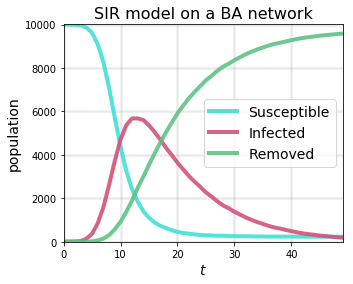

In [119]:
#let's define the model
N = 10000
seed_num = 5
T = 50
transmissions = {'S' : ('I', 'contagion', 'beta'), 'I' : ('R', 'spontaneous', 'mu')}
params = {'beta' : 0.1, 'mu' : 0.1}

G = nx.barabasi_albert_graph(N,4)
compartments = {'S': list(),'I': list(), 'R': list()}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['S'], c=cols[-2], linewidth=4.0, alpha=0.9, label='Susceptible') 
ax.plot(range(T), compartments['I'], c=cols[-3], linewidth=4.0, alpha=0.9, label='Infected') 
ax.plot(range(T), compartments['R'], c=cols[-4], linewidth=4.0, alpha=0.9, label='Removed') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N+10)
ax.set_title("SIR model on a BA network", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/BA_network_SIR.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/BA_network_SIR.pdf', dpi=425, bbox_inches='tight')

plt.show()

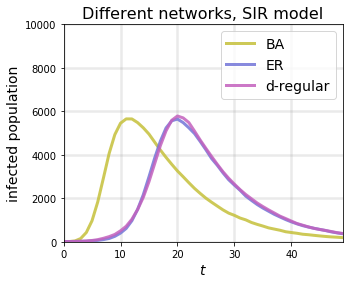

In [120]:
G = nx.barabasi_albert_graph(N,4)
compartments = {'S': list(),'I': list(), 'R': list()}

avg_k = 2.*G.number_of_edges()/N

G_er = nx.erdos_renyi_graph(N, avg_k/N)
compartments_er = {'S': list(),'I': list(), 'R': list()}

G_R = nx.random_regular_graph(int(round(avg_k)), N)
compartments_R = {'S': list(),'I': list(), 'R': list()}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)
epidemic_model_network(G_R, compartments_R, seed_num, T, transmissions, params)
epidemic_model_network(G_er, compartments_er, seed_num, T, transmissions, params)

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(range(T), compartments['I'],   c=cols[0], linewidth=3.0, alpha=0.85, label='BA') 
ax.plot(range(T), compartments_er['I'],c=cols[1], linewidth=3.0, alpha=0.85, label='ER') 
ax.plot(range(T), compartments_R['I'], c=cols[3], linewidth=3.0, alpha=0.85, label='d-regular') 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('infected population', fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N)
ax.set_title("Different networks, SIR model", fontsize=16)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')

plt.savefig('figs/pngs/different_networks_SIR.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/different_networks_SIR.pdf', dpi=425, bbox_inches='tight')
plt.show() 

____________

# Immunization of heterogeneous networks

* Immunization strategies on networks:
    * to increase the immunization level of populations 
    * to decrease the chances of epidemic outbreaks.

* The weakness of scale-free networks to epidemic attacks

### Random immunization (uniform immunization)
* immunize nodes randomly (according to uniform distribution)

* Let $g$ be the density of immune nodes (or probability of a node to be immunized)

* The effective transmission rate $\beta \rightarrow (1-g)\beta$

* $R_0$ now becomes $$R_0 = \frac{\beta}{\mu}(1-g)$$

* Recall, the epidemic threshold $$R_0 > \frac{\langle k \rangle}{\langle k^2 \rangle}$$

* so the __immunization threshold $g_c$__ $$\frac{\beta}{\mu}(1-g_c) = \frac{\langle k \rangle}{\langle k^2 \rangle}$$

* for scale-free networks

    * $\langle k^2 \rangle \rightarrow \infty$
    
    * __only a complete immunization of the network ensures an infection-free stationary state__ in the thermodynamic limit ($g_c = 1$)

In [121]:
from random import sample, uniform

def epidemic_model_network(G, compartments, seed_num, T, transmissions, params, immunized_nodes = None):
    N = G.number_of_nodes()
    # for t = 0
    for cmpt in compartments.keys():
        if cmpt == susceptible_compartment:
            compartments[cmpt].append(N - seed_num)
        elif cmpt == infectious_compartment:
            compartments[cmpt].append(seed_num)
        else:
            compartments[cmpt].append(0)
            
    # initialize node status
    for node in G.nodes():
        G.node[node]['status'] = susceptible_compartment
        G.node[node]['next_status'] = None
        
    init_seed_nodes = np.random.choice(G.nodes(), seed_num)

    if immunized_nodes:
        for node in immunized_nodes:
            G.node[node]['status'] = 'immune'
            
        # making sure there aren't nodes who are both initialized and immunized
        while set(init_seed_nodes) & set(immunized_nodes):
            init_seed_nodes = np.random.choice(G.nodes(), seed_num)
        
    for node in init_seed_nodes:
        G.node[node]['status'] = infectious_compartment
    
    for t in range(1, T):
        for n in G.nodes():
            neighbors = G.neighbors(n)
            n_status = G.node[n]['status']
            
            try:
                trans = transmissions[n_status]
                new_status = trans[0]
                trans_type = trans[1]
                trans_rate = params[trans[2]]
                
                if trans_type == 'contagion':
                    for nj in neighbors:
                        
                        # now some nodes are immunized
                        if G.node[nj]['status'] == 'immune':
                            continue
                            
                        if G.node[nj]['status'] == new_status:
                            if uniform(0, 1) < trans_rate:
                                G.node[n]['next_status'] = new_status
                else:
                    if uniform(0, 1) < trans_rate:
                        G.node[n]['next_status'] = new_status
            except KeyError:
                pass
        
        # update node status
        # first update the counts for each compartment with values from previous step
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)
        for n in G.nodes():
            
            if G.node[n]['status'] == 'immune':
                continue
                
            if G.node[n]['next_status']:
                G.node[n]['status'] = G.node[n]['next_status']
                G.node[n]['next_status'] = None

            compartments[G.node[n]['status']][t] += 1
            
def uniform_immunization(G, g):
    # g is immune node probability
    immune_size = int(g * G.number_of_nodes())
    return list(np.random.choice(G.nodes(), immune_size))



### Targeted immunization

* Heavy-tailed networks hinder the efficiency of naive uniform immunization strategies.

* But we can take advantage of their heterogenity to re-think other immunization strategies

* The simplest solution: let's immunize nodes with highest degrees.

    * rank nodes by their degrees
    
    * immunize the top $g$ fraction of nodes
    
    * equivalently, introducing an upper cut-off $k_c(g)$, for any node with $k>k_c(g)$ is immune.
    
    * the immune threshold $$\frac{\beta}{\mu} = \frac{\langle k \rangle_{g_c}}{\langle k^2 \rangle}_{g_c}$$
    
    * for scale-free networks with $\gamma=3$, $$g_c \sim e^{-\dfrac{2\mu}{k_{min}\beta}}$$ 

In [122]:
transmissions = {'S' : ('I', 'contagion', 'beta'), 'I' : ('S', 'spontaneous', 'mu')}

params = {'beta' : 0.2,'mu' : 0.1}

susceptible_compartment = 'S'
infectious_compartment = 'I'

N = 1000
G = nx.barabasi_albert_graph(N, 3)
seed_num = 5
T = 100

compartments = {'S': list(), 'I': list()}
compartments_with_immunization = {'S': list(),'I': list()}
epidemic_model_network(G, compartments, seed_num, T, transmissions, params, immunized_nodes = None)

gc = 0.1
immunized_nodes = uniform_immunization(G,gc)
epidemic_model_network(G, compartments_with_immunization, seed_num, T, transmissions, params, immunized_nodes)

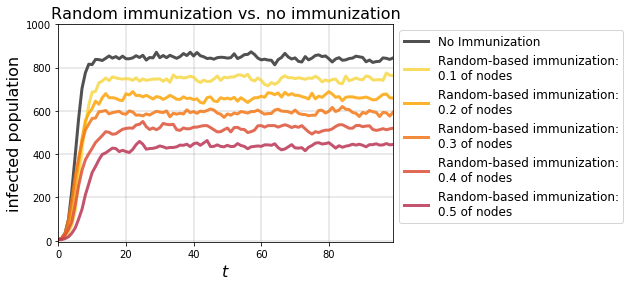

In [123]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

immunization_fracs = np.linspace(0.1, 0.5, 5)
immunization_cols = plt.cm.inferno_r(immunization_fracs)

ax.plot(range(T), compartments['I'], color='#333333', lw=3.0, alpha=0.85, label='No Immunization')
for i,g in enumerate(np.linspace(0.1, 0.5, 5)):
    compartments_with_immunization = {'S': list(),'I': list()}
    immunized_nodes = uniform_immunization(G,g)
    epidemic_model_network(G, compartments_with_immunization, seed_num,
                           T, transmissions, params, immunized_nodes)

    ax.plot(range(T), compartments_with_immunization['I'], linewidth=3.0, alpha=0.85,
            label = 'Random-based immunization:\n%.1f of nodes' % g,
            color=immunization_cols[i])
    
    ax.set_xlabel(r"$t$", fontsize=16)
    ax.set_ylabel('infected population', fontsize=16)
    ax.grid(linewidth=2.0, color='#999999', alpha=0.2, linestyle='-')

ax.set_title('Random immunization vs. no immunization',fontsize=16)
# ax.legend(loc=4,fontsize=11)
ax.legend(bbox_to_anchor=[1.0,1.0],fontsize=12)
ax.set_ylim(-5,N)
ax.set_xlim(0,T-1)

plt.savefig('figs/pngs/random_immunization.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/random_immunization.pdf', dpi=425, bbox_inches='tight')
plt.show()

In [124]:
def target_immunization(G, g):
    immune_size = int(g * G.number_of_nodes())
    sorted_node_degree = sorted(dict(G.degree()).items(), key = operator.itemgetter(1), reverse = True)
    
    return map(lambda x:x[0], sorted_node_degree[:immune_size])

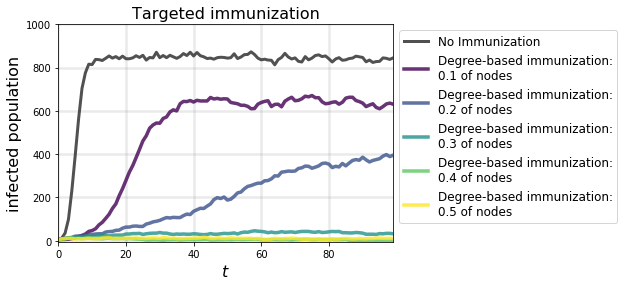

In [125]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

immunization_fracs = np.linspace(0.1, 0.5, 5)
immunization_cols = plt.cm.viridis(np.linspace(0,1,len(immunization_fracs)))

ax.plot(range(T), compartments['I'], color='#333333', lw=3.0, alpha=0.85, label='No Immunization')
for i,g in enumerate(np.linspace(0.1, 0.5, 5)):
    compartments_with_immunization = {'S': list(),'I': list()}
    immunized_nodes = target_immunization(G,g)
    epidemic_model_network(G, compartments_with_immunization, seed_num, 
                           T, transmissions, params, immunized_nodes)
    
    ax.plot(range(T), compartments_with_immunization['I'], linewidth=3.5, alpha=0.8,
            label = 'Degree-based immunization:\n%.1f of nodes' % g,
            color=immunization_cols[i])
    
ax.set_xlim(0,T-1)
ax.set_ylim(-5,N)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')
    
ax.set_title("Targeted immunization", fontsize=16)
ax.set_xlabel(r"$t$", fontsize=16)
ax.set_ylabel('infected population', fontsize=16)
ax.legend(bbox_to_anchor=[1.0,1.0],fontsize=12)

plt.savefig('figs/pngs/targeted_immunization.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/targeted_immunization.pdf', dpi=425, bbox_inches='tight')
plt.show()

In [126]:
# for each g, you do the final density of i divided by a non-immunization i_g / i_0
final_prevalence_random = [] 
final_prevalence_target = []

g_list = np.linspace(0, 0.5, 101)
T = 200
t_avg = 10

for g in g_list:
    compartments_with_immunization = {'S': list(),'I': list()}
    immunized_nodes = target_immunization(G,g)
    epidemic_model_network(G, compartments_with_immunization, 
                           seed_num, T, transmissions, params, immunized_nodes)
    final_prevalence_target.append(np.mean(compartments_with_immunization['I'][-t_avg:]))
    
print("halfway done")    
for g in g_list:
    compartments_with_immunization = {'S': list(),'I': list()}
    immunized_nodes = uniform_immunization(G,g)
    epidemic_model_network(G, compartments_with_immunization, 
                           seed_num, T, transmissions, params, immunized_nodes)
    final_prevalence_random.append(np.mean(compartments_with_immunization['I'][-t_avg:]))

halfway done


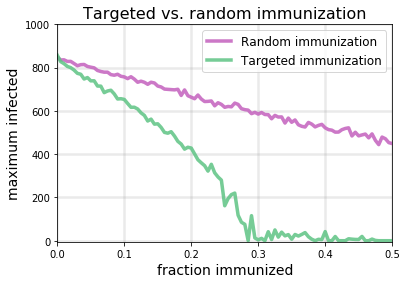

In [127]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(g_list, final_prevalence_random, color=cols[3], lw=3.5, alpha=0.85, label='Random immunization')
ax.plot(g_list, final_prevalence_target, color=cols[4], lw=3.5, alpha=0.85, label='Targeted immunization')
    
ax.set_xlim(0,g_list[-1])
ax.set_ylim(-5,N)
ax.grid(linewidth=2.5, color='#999999', alpha=0.2, linestyle='-')
    
ax.set_title("Targeted vs. random immunization", fontsize=16)
ax.set_xlabel("fraction immunized", fontsize=14)
ax.set_ylabel('maximum infected', fontsize=14)
ax.legend(fontsize=12)

plt.savefig('figs/pngs/targeted_vs_random_immunization.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/targeted_vs_random_immunization.pdf', dpi=425, bbox_inches='tight')
plt.show()

___

# Fun Datasets

## Dataset 1: USA commuter network

In [128]:
import pickle
with open('datasets/commuter.pickle', 'rb') as handle:
    commute_network = pickle.load(handle)

In [129]:
G = nx.DiGraph()
for i in list(commute_network.keys()):
    G.add_node(i, pos=commute_network[i]['pos'], 
                  population=commute_network[i]['population'],
                  state=commute_network[i]['state'],
                  housing=commute_network[i]['housing'])
    edge_data = commute_network[i]['edge_data']
    for j in range(len(edge_data['edges'])):
        G.add_edge(i, edge_data['edges'][j], weight=edge_data['weight'][j], margin=edge_data['margin'][j])

In [130]:
pos = dict(nx.get_node_attributes(G,'pos'))
xs = list(list(zip(*list(pos.values())))[0])
ys = list(list(zip(*list(pos.values())))[1])

In [131]:
gp = nx.to_undirected(G)

In [132]:
### if you want fancy-community-detection-coloring
# import community
# partition = community.best_partition(gp)
# comms = np.unique(list(partition.values()))
# ncomm = len(comms)
# cmap_cols = plt.cm.hsv(np.linspace(0,1,ncomm))
# node_colors = [cmap_cols[com] for com in partition.values()]

statehood = nx.get_node_attributes(G,'state')
unique_states = np.unique(list(statehood.values()))
np.random.shuffle(unique_states)
nstates = len(unique_states)
cmap_cols = dict(zip(unique_states,plt.cm.hsv(np.linspace(0,1,nstates))))
node_colors = [cmap_cols[com] for com in statehood.values()]

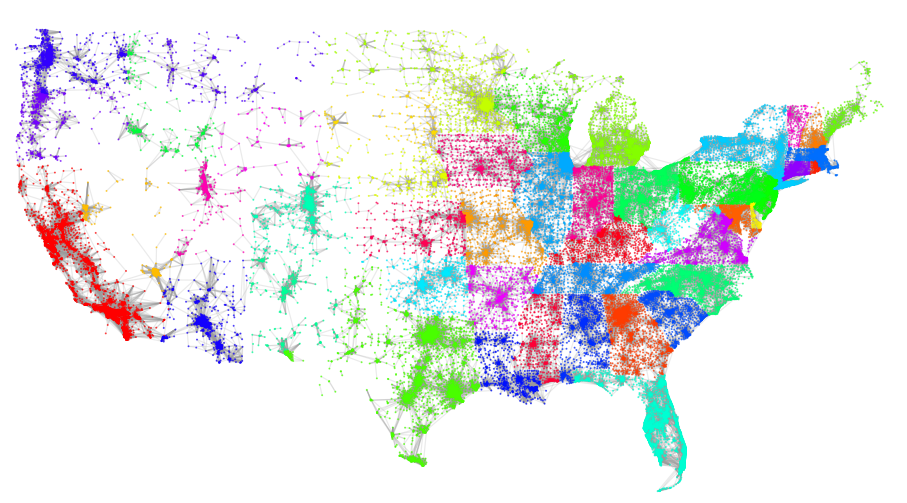

In [133]:
mult=1.0
fig, ax = plt.subplots(1,1,figsize=(16*mult,9*mult))

ns = 1.0
ew = 1.2
ec = '#999999'
nc = node_colors

nx.draw_networkx_edges(gp, pos, width=ew, edge_color=ec, ax=ax, alpha=0.2)
nx.draw_networkx_nodes(gp, pos, node_size=ns, node_color=nc, ax=ax, alpha=0.6)

ax.set_axis_off()

xdiff = max(xs)-min(xs)
ydiff = max(ys)-min(ys)

ax.set_ylim(min(ys)-ydiff*0.01, max(ys)+ydiff*0.05)
ax.set_xlim(min(xs)-xdiff*0.01, max(xs)+xdiff*0.02)

plt.savefig('figs/pngs/USA_commutes.png', dpi=600, bbox_inches='tight')
# plt.savefig('figs/pdfs/USA_commutes.pdf', dpi=600, bbox_inches='tight')
plt.show()

## Dataset 2: Universal language

In [134]:
import pandas as pd
fn = 'datasets/univ_language.txt'
data = pd.read_csv(fn, sep=' ', skiprows=1)

In [135]:
data.head()

Language            Region     Globe Abbreviation Var1  Var2  Var3  \
0  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
1  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
2  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
3  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
4  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   

          Meaning            Word  
0        CLOUD(S)  !kx'ôe_ǁnàn-sâ  
1           RIVER     !náu_'|nṵ́m  
2     watercourse     !náu_'|nṵ́m  
3  amniotic_fluid           !qhàa  
4            rain           !qhàa

In [136]:
source = list(data.Meaning)
target = list(data.Word)
edgelist = list(zip(source, target))
G = nx.from_edgelist(edgelist)

In [138]:
import community
partition = community.best_partition(G)

comcols = ["#84e8d8","#ef7664","#59e19e","#e081d4","#71bc62","#a98ae5","#d3e671","#6c96ef","#96af39",
           "#53a4e5","#dd973f","#63c4e1","#c8b147","#b1b9e9","#aca858","#ea7aa2","#bce59d","#d0a2d3",
           "#71b990","#db9869","#799fc8","#e6d59f","#5db1aa","#d89a98","#a1a776"]
np.random.shuffle(comcols)

colorzz = [comcols[com] for com in partition.values()]

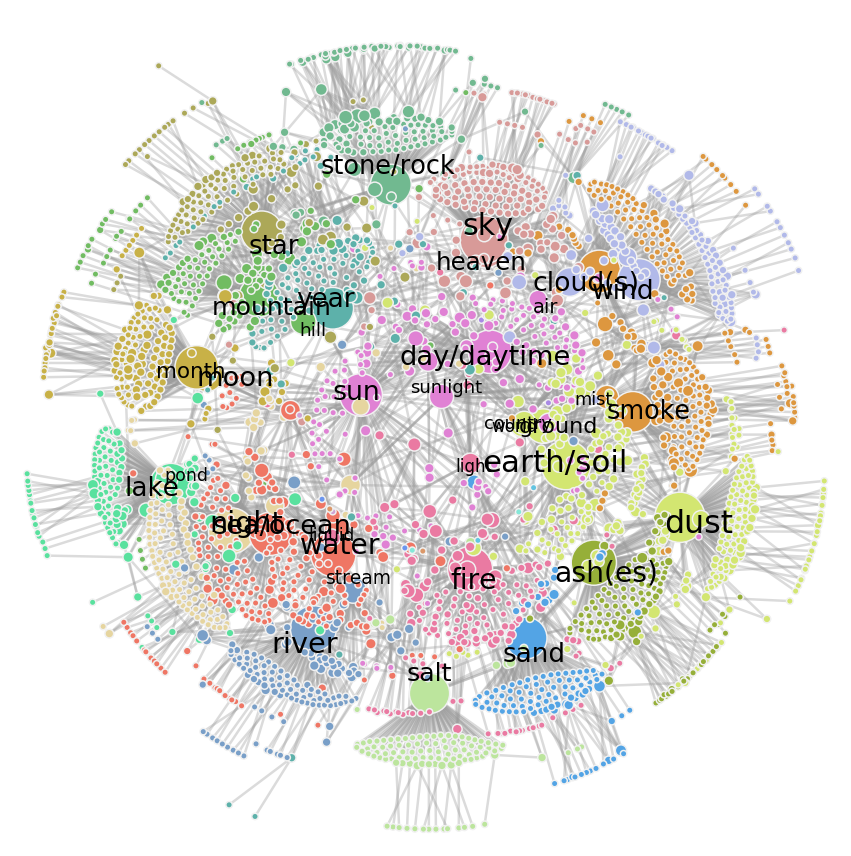

In [139]:
ews = 2.5
degs = np.array(list(dict(G.degree()).values()))
ns = degs*17 + 25
fig, ax = plt.subplots(1,1,figsize=(15,15.5))

pos0 = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, pos=pos0, iterations=1, k=0.05)

nx.draw_networkx_nodes(G, pos, node_size=ns, node_color=colorzz, linewidths=1.5, 
                       edgecolors='#f1f1f1', ax=ax)
nx.draw_networkx_edges(G, pos, edge_color="#999999", width=ews, alpha=0.35, ax=ax)

xx = [0.925,1.075]
ii = 0
for i in G.nodes():
    if G.degree(i) > np.quantile(degs,0.9885):
        if ii%2==0:
            rr = 0
        nudge = xx[rr]
        lab = i.lower()
        if lab == 'hi':
            lab = ''
        if lab == 'moon':
            nudge = nudge*0.9
        if lab == 'air':
            nudge = nudge*0.9
        if lab == 'sunlight':
            nudge = nudge*1.2
        if lab == 'ground':
            nudge = nudge*1.05
        if lab == 'country':
            nudge = nudge*0.875
        pos_i = {i:(pos[i][0]*nudge,pos[i][1]*nudge)}
        nx.draw_networkx_labels(G, pos_i, labels={i:lab}, 
                                font_size=0.12*G.degree(i)+14)#, font_weight='bold')
        ii += 1
        rr = 1

posx = list(zip(*list(pos.values())))[0]
posy = list(zip(*list(pos.values())))[1]
xrange = np.abs(max(posx)) + np.abs(min(posx))
yrange = np.abs(max(posy)) + np.abs(min(posy))
plt.xlim(min(posx)-xrange*0.025, max(posx)+xrange*0.025)
plt.ylim(min(posy)-yrange*0.025, max(posy)+yrange*0.05)
plt.axis('off')

plt.savefig('figs/pngs/UniversalLanguage.png', bbox_inches='tight', dpi=425)
plt.savefig('figs/pdfs/UniversalLanguage.pdf', bbox_inches='tight', dpi=425)
plt.show()

In [ ]:
# dark background version

# comcols = ["#cc5e29","#bb5fd2","#5dcc78","#da972b","#50682b","#6cba8d","#b1c97c","#6c7ecf",
#            "#c38fcc","#894429","#51cac3","#ca9b63","#6b6fea","#573a74","#b7a445","#65a4d0",
#            "#d94782","#58359f","#c54ea9","#d64546","#c76a6c","#bed245","#e7ca2f","#7bc449","#9b4b6c"]

# np.random.shuffle(comcols)
# colorzz = [comcols[com] for com in partition.values()]

# ews = 3.5
# degs = np.array(list(dict(G.degree()).values()))
# ns = degs*20 + 35
# fig, ax = plt.subplots(1,1,figsize=(15,15.5))
# pos0 = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G, pos=pos0, iterations=1, k=0.05)
# nx.draw_networkx_nodes(G, pos, node_size=ns, node_color=colorzz, linewidths=2.0, 
#                        edgecolors='#3c3c39', ax=ax)
# nx.draw_networkx_edges(G, pos, edge_color="#999999", width=ews, alpha=0.4, ax=ax)

# xx = [0.925,1.075]
# ii = 0
# for i in G.nodes():
#     if G.degree(i) > np.quantile(degs,0.9885):
#         if ii%2==0:
#             rr = 0
#         nudge = xx[rr]
#         lab = i.lower()
#         if lab == 'hi':
#             lab = ''
#         if lab == 'moon':
#             nudge = nudge*0.9
#         if lab == 'air':
#             nudge = nudge*0.9
#         if lab == 'sunlight':
#             nudge = nudge*1.2
#         if lab == 'ground':
#             nudge = nudge*1.05
#         if lab == 'country':
#             nudge = nudge*0.875
#         pos_i = {i:(pos[i][0]*nudge,pos[i][1]*nudge)}
#         nx.draw_networkx_labels(G, pos_i, labels={i:lab}, font_size=0.15*G.degree(i)+14, 
#                                 font_color='#ecece9')
#         ii += 1
#         rr = 1

# posx = list(zip(*list(pos.values())))[0]
# posy = list(zip(*list(pos.values())))[1]
# xrange = np.abs(max(posx)) + np.abs(min(posx))
# yrange = np.abs(max(posy)) + np.abs(min(posy))
# plt.xlim(min(posx)-xrange*0.025, max(posx)+xrange*0.075)
# plt.ylim(min(posy)-yrange*0.025, max(posy)+yrange*0.05)
# plt.axis('off')

# # plt.savefig('figs/pngs/UniversalLanguage_dark.png', bbox_inches='tight', dpi=425, facecolor='#242423')
# # plt.savefig('figs/pdfs/UniversalLanguage_dark.pdf', bbox_inches='tight', dpi=425, facecolor='#242423')
# plt.show()

_________________

## References:
1. __[Barrat, A., Barthelemy, M., & Vespignani, A. (2008). Dynamical processes on complex networks. Cambridge university press.](https://www.cambridge.org/core/books/dynamical-processes-on-complex-networks/D0173F07E0F05CEE9CF7A6BDAF48E9FC)__
2. __[Newman, M. E. (2003). Mixing patterns in networks. *Physical Review E*, 67(2), 026126.](http://www.uvm.edu/pdodds/research/papers/others/2003/newman2003e.pdf)__
3. __[Fagiolo, G. (2007). Clustering in complex directed networks. *Physical Review E*, 76(2), 026107.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.76.026107)__
4. __[Barabási, A. L., & Albert, R. (1999). Emergence of scaling in random networks. *Science*, 286(5439), 509-512.](https://science.sciencemag.org/content/286/5439/509)__
5. __[Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of ‘small-world’ networks. *Nature*, 393(6684), 440.](https://www.nature.com/articles/30918.)__
6. __[Gómez-Gardeñes, J., & Moreno, Y. (2006). From scale-free to Erdos-Rényi networks. *Physical Review E*, 73(5), 056124.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.73.056124)__
7. __[Erdös, P., & Rényi, A. (1959). On random graphs, I. Publicationes Mathematicae (Debrecen), 6, 290-297.](http://snap.stanford.edu/class/cs224w-readings/erdos59random.pdf)__
8. __[Fortunato, S. (2010). Community detection in graphs. *Physics Reports*, 486(3), 75-174.](https://www.sciencedirect.com/science/article/abs/pii/S0370157309002841)__
9. __[Newman, M. E. (2006). Modularity and community structure in networks. *Proceedings of the National Academy of Sciences*, 103(23), 8577-8582.](https://www.pnas.org/content/103/23/8577)__
10. __[Newman, M. E. (2012). Communities, modules and large-scale structure in networks. Nature Physics, 8(1), 25-31.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.295.535&rep=rep1&type=pdf)__
11. __[Pastor-Satorras, R., & Vespignani, A. (2002). Immunization of complex networks. Physical review E, 65(3), 036104.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.65.036104)__
12. __[Delvenne, J. C., Yaliraki, S. N., & Barahona, M. (2010). Stability of graph communities across time scales. *Proceedings of the National Academy of Sciences*, 107(29), 12755-12760.](https://www.pnas.org/content/107/29/12755)__
13. __[Lambiotte, R., Delvenne, J. C., & Barahona, M. (2008). Laplacian dynamics and multiscale modular structure in networks.](https://arxiv.org/pdf/0812.1770.pdf)__
14. __[Delvenne, J. C., Schaub, M. T., Yaliraki, S. N., & Barahona, M. (2013). The stability of a graph partition: A dynamics-based framework for community detection. In Dynamics On and Of Complex Networks, Volume 2 (pp. 221-242). Springer New York.](https://arxiv.org/abs/1308.1605)__
15. __[Schaub, M. T., Delvenne, J. C., Yaliraki, S. N., & Barahona, M. (2012). Markov dynamics as a zooming lens for multiscale community detection: non clique-like communities and the field-of-view limit. *PloS One*, 7(2), e32210.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0032210)__
16. __[Lancichinetti, A., Fortunato, S., & Radicchi, F. (2008). Benchmark graphs for testing community detection algorithms. *Physical Review E*, 78(4), 046110.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.78.046110)__
17. __[Adamic, L. A., & Glance, N. (2005, August). The political blogosphere and the 2004 US election: divided they blog. *In Proceedings of the 3rd international workshop on Link discovery* (pp. 36-43). ACM.](http://www.ramb.ethz.ch/CDstore/www2005-ws/workshop/wf10/AdamicGlanceBlogWWW.pdf)__
18. __[Clauset, A., Shalizi, C. R., & Newman, M. E. (2009). Power-law distributions in empirical data. *SIAM Review*, 51(4), 661-703.](https://arxiv.org/abs/0706.1062)__
19. __[Voitalov, I., van der Hoorn, P., van der Hofstad, R., & Krioukov, D. (2018). Scale-free networks well done. arXiv preprint arXiv:1811.02071.](https://arxiv.org/abs/1811.02071)__
20. __[Broido, A. D., & Clauset, A. (2019). Scale-free networks are rare. *Nature Communications*, 10(1), 1017.](https://www.nature.com/articles/s41467-019-08746-5)__
21. __[Young, J. G., Hébert-Dufresne, L., Laurence, E., Murphy, C., St-Onge, G., & Desrosiers, P. (2018). Network archaeology: phase transition in the recoverability of network history. arXiv preprint arXiv:1803.09191.](https://arxiv.org/abs/1803.09191)__


## Useful links:
*  __[10gb of Jupyter notebooks (need to update, but there's nonetheless a ton)](https://www.dropbox.com/sh/zlih7ac2d9xb3ao/AADCM4DQXpGLsW5E53S_mGUba?dl=0)__